# AIM of the Project `Obesity_Cluster`

To analyze the Principle Component Application (PCA) usage in the CLustering algorithm.

We have taken a Obesity dataset from kaggle.

**About Dataset:**


The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.

Source: <br>
https://www.kaggle.com/datasets/aravindpcoder/
obesity-or-cvd-risk-classifyregressorcluster/data

<br>
The attributes related with eating habits are:

    Frequent consumption of high caloric food (FAVC),
    Frequency of consumption of vegetables (FCVC),
    Number of main meals (NCP),
    Consumption of food between meals (CAEC),
    Consumption of water daily (CH20),
    and Consumption of alcohol (CALC).

The attributes related with the physical condition are:

    Calories consumption monitoring (SCC),
    Physical activity frequency (FAF),
    Time using technology devices (TUE),
    Transportation used (MTRANS)


variables obtained :

    Gender
    Age
    Height
    Weight

NObesity values are:

    •Underweight Less than 18.5
    •Normal 18.5 to 24.9
    •Overweight 25.0 to 29.9
    •Obesity I 30.0 to 34.9
    •Obesity II 35.0 to 39.9
    •Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.



<a id="section_ID"></a>


## 1. Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Read the dataset
data = pd.read_csv("ObesityDataSet.csv")
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
data.index

RangeIndex(start=0, stop=2111, step=1)

In [ ]:
# To check the dimensions of the data
data.shape

(2111, 17)

In [ ]:
data.info()
# data.dtypes
# data.isnull().sum()
# data.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

We have 2111 records of 17 features in the given data set including the target feature "NObeyesdad". And the data set cleaned set, there is no null values.

There is Numerical(float64) and Categorical (object) data types in the data set.

In [ ]:
data.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [ ]:
# To check the categorical features.
print('The Categorical features are:\n')
data.columns[(data.dtypes.values == 'object')].tolist()

The Categorical features are:



['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [ ]:
# To check the categorical features.
print('The Numerical features are:\n')
data.columns[(data.dtypes.values == 'float64')].tolist()

The Numerical features are:



['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [ ]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# data.FCVC.unique().tolist()
# data.TUE.unique().tolist()

### Univariate Analysis ofNumerical Columns:

Visualize the distribution of numerical columns using histograms and box plots.

In [ ]:
# To plot the Box plots (way-1)
"""
for col in num_cols:
   plt.figure(figsize=(8, 4))
   sns.boxplot(x=data[col])
   plt.title(f'Box plot of {col}')
   plt.show()

"""

"\nfor col in num_cols:\n   plt.figure(figsize=(8, 4))\n   sns.boxplot(x=data[col])\n   plt.title(f'Box plot of {col}')\n   plt.show()\n\n"

In [ ]:
# Plotting histograms (way-1)

"""

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
   sns.histplot(data[col], bins=15, kde=True, ax=axes[i])
   axes[i].set_title(col)

plt.tight_layout()
plt.show()

num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

data[num_cols].hist(bins=15, figsize=(15, 10), layout=(4, 2))
plt.show()

"""


'\n\nfig, axes = plt.subplots(3, 3, figsize=(15, 10))\naxes = axes.flatten()\n\nfor i, col in enumerate(num_cols):\n   sns.histplot(data[col], bins=15, kde=True, ax=axes[i])\n   axes[i].set_title(col)\n\nplt.tight_layout()\nplt.show()\n\nnum_cols = data.select_dtypes(include=[np.number]).columns.tolist()\n\ndata[num_cols].hist(bins=15, figsize=(15, 10), layout=(4, 2))\nplt.show()\n\n'

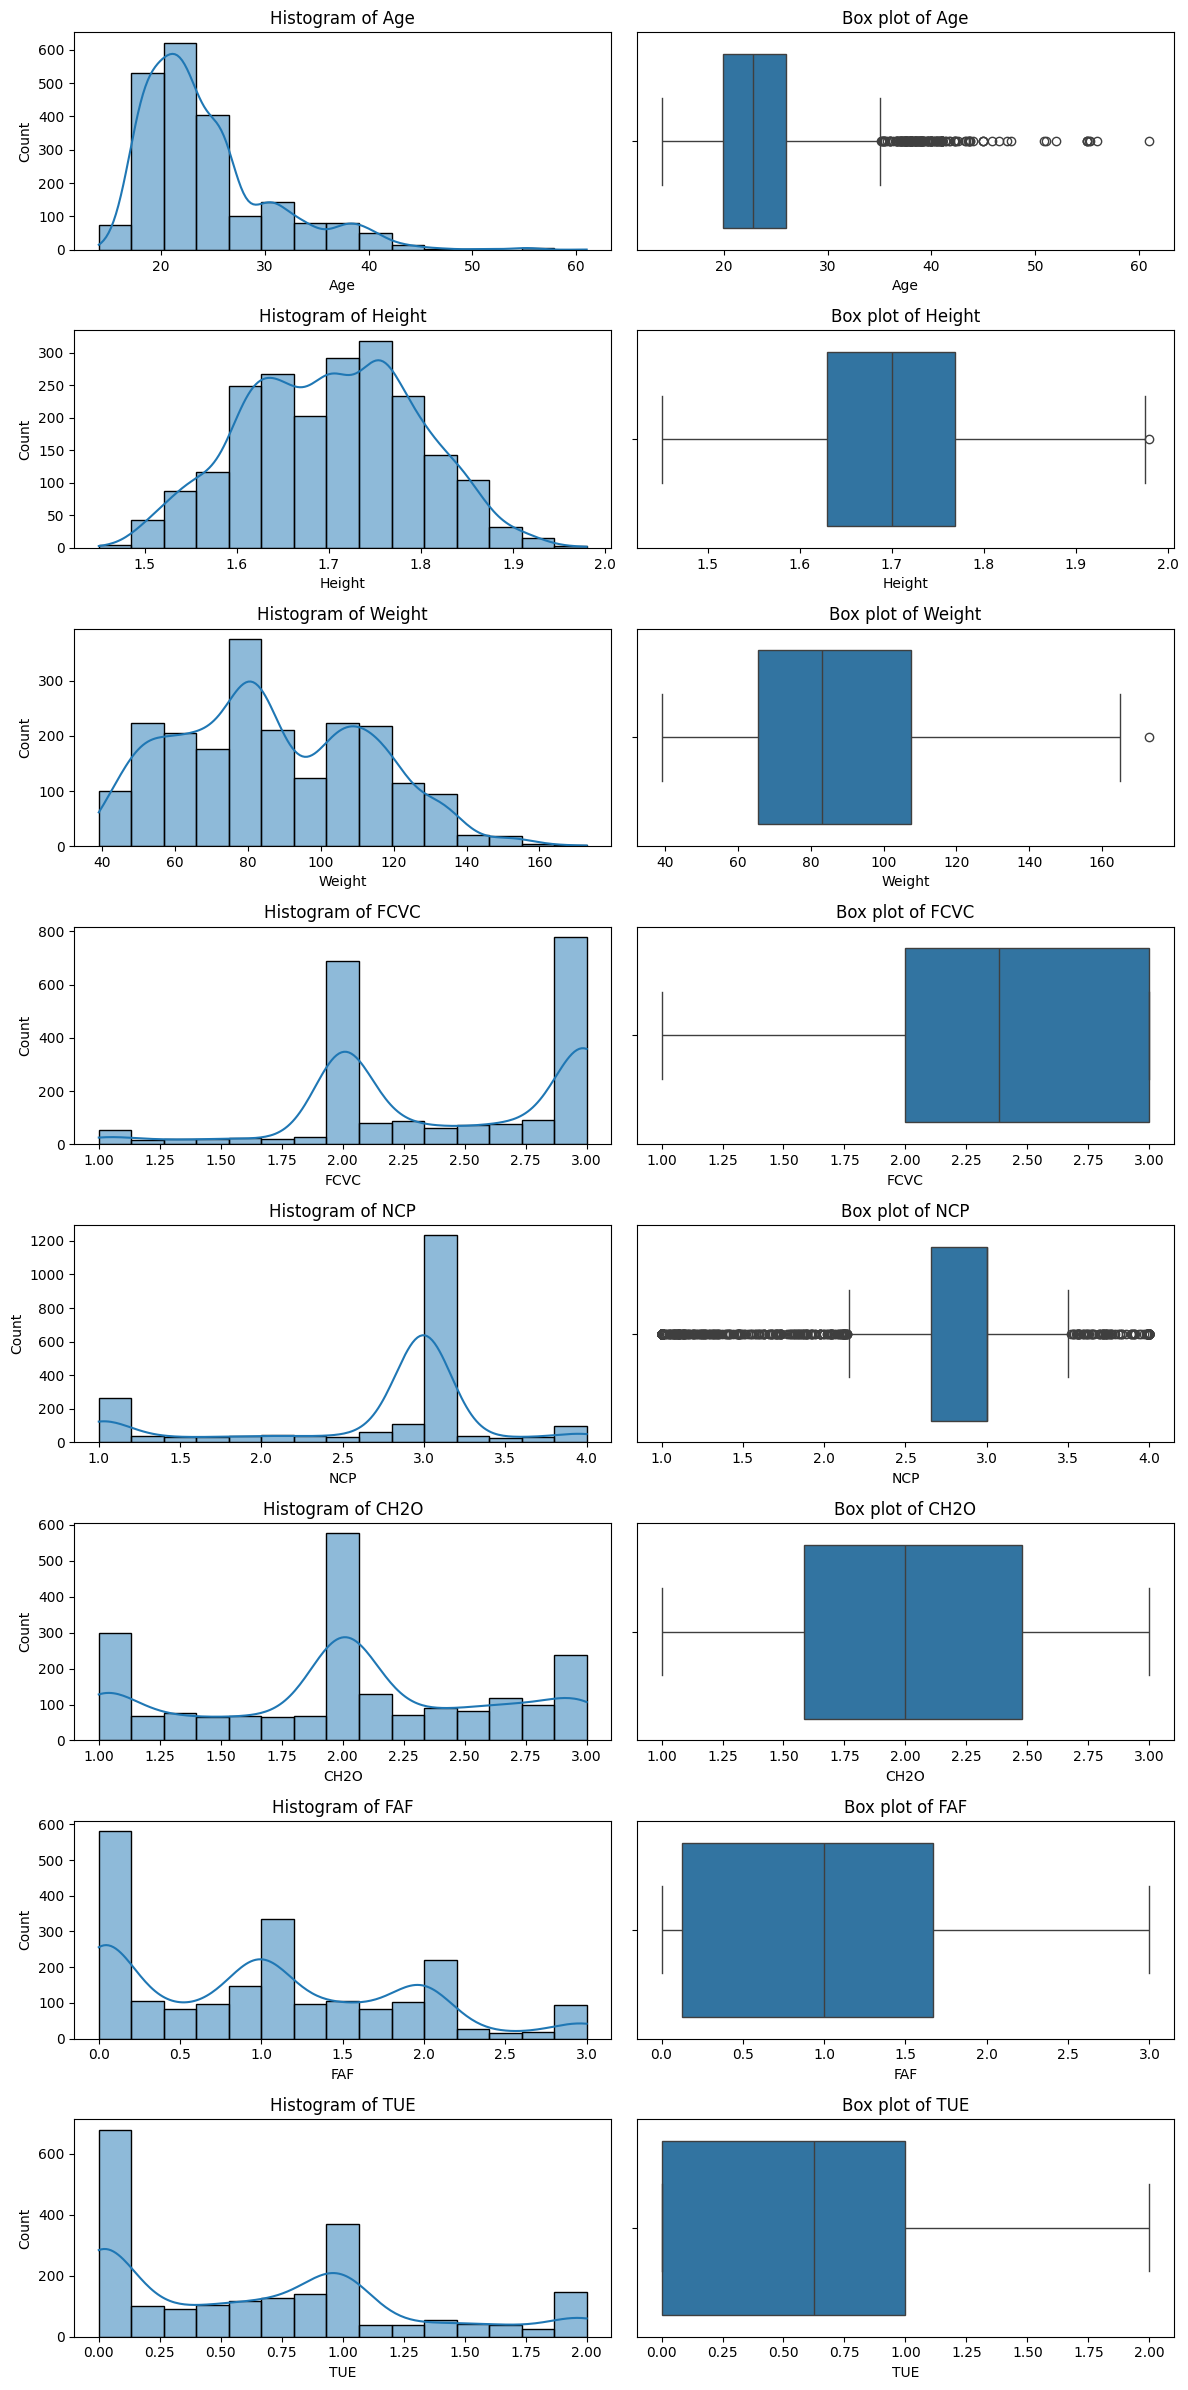

In [ ]:
# Plotting histograms & Box plots (way-2) (combined one)

num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
n = len(num_cols)

fig, axes = plt.subplots(n, 2, figsize=(12, 3 * n))

for i, col in enumerate(num_cols):
    # Histogram with KDE
    sns.histplot(data[col], bins=15, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')

    # Box plot
    sns.boxplot(x=data[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


For Categorical Columns

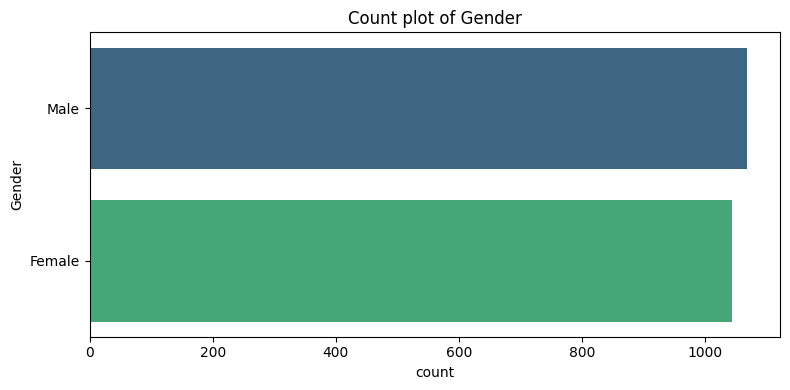

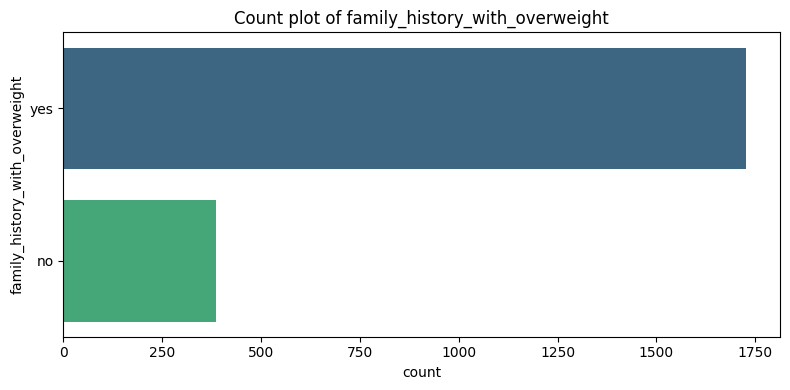

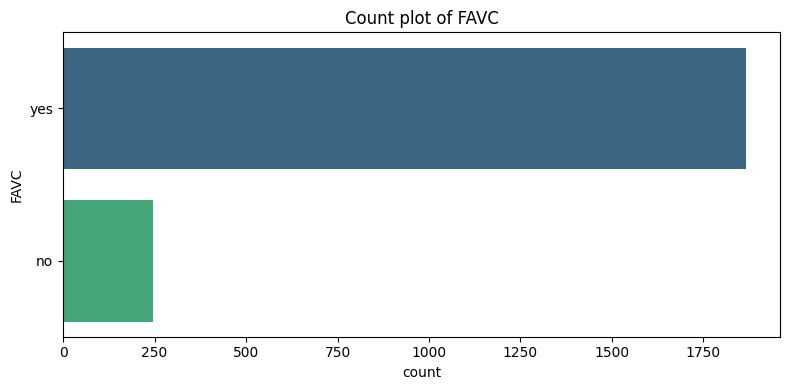

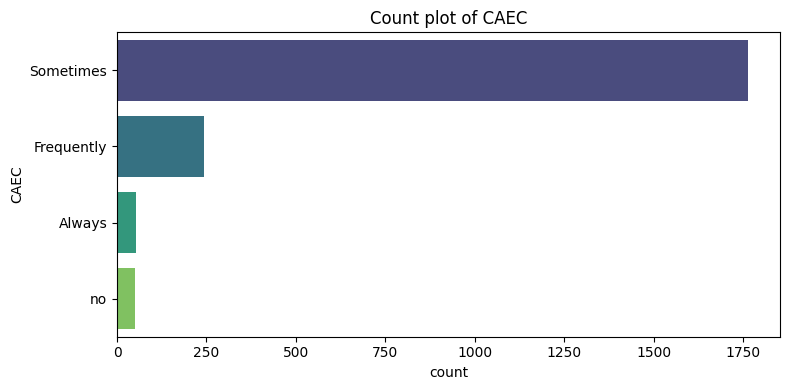

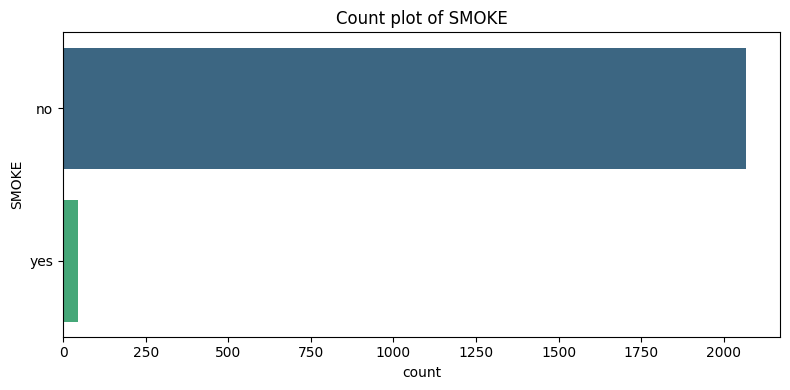

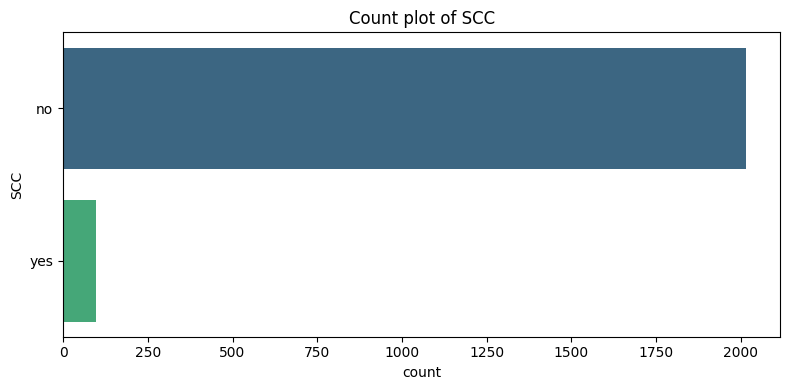

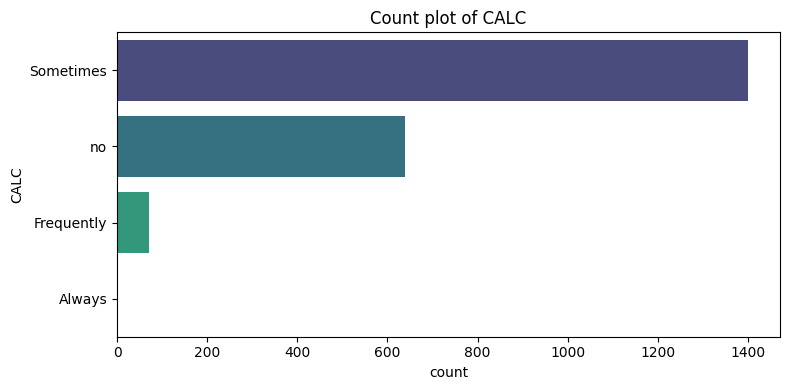

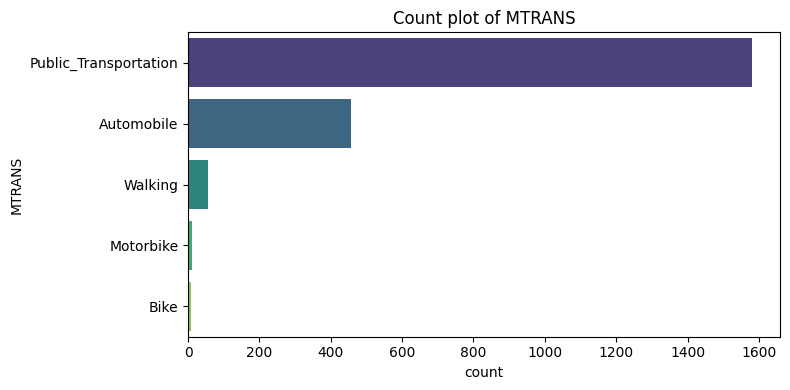

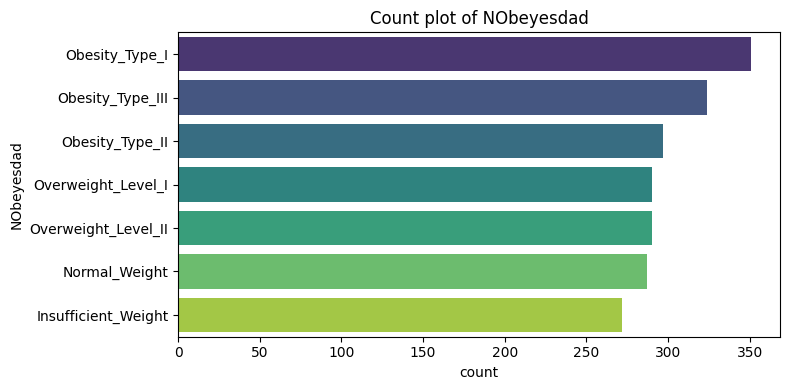

In [ ]:
# List of categorical columns in our dataset
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Bar plots
for i, col in enumerate(cat_cols):
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette="viridis")
    plt.title(f'Count plot of {col}')
    plt.tight_layout()
    plt.show()



### Bivariate Analysis Numerical vs Numerical

Based on the count plot of the categorical variable we can visualise the unique values spread in each category variables.

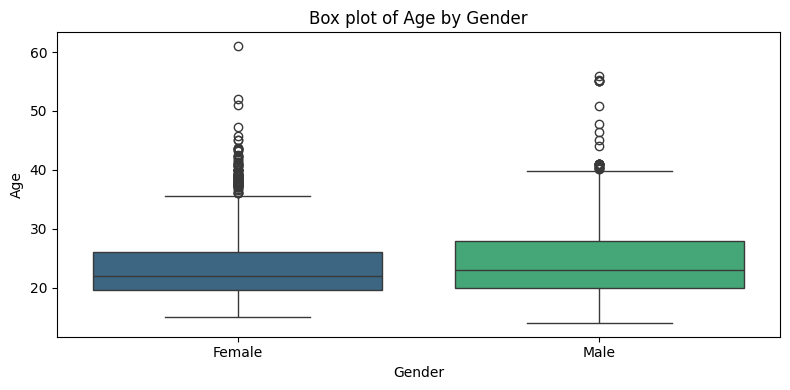

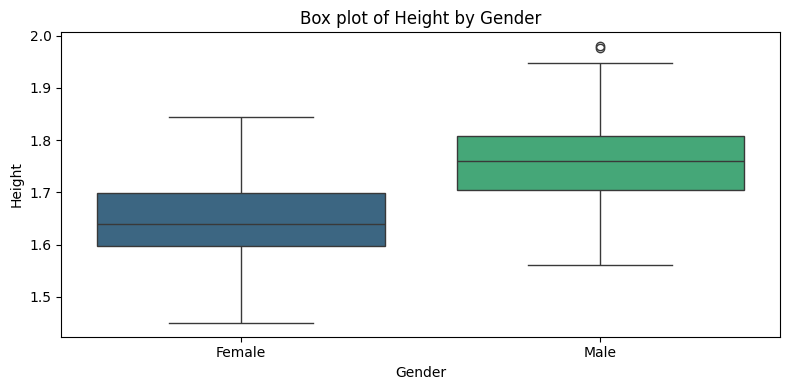

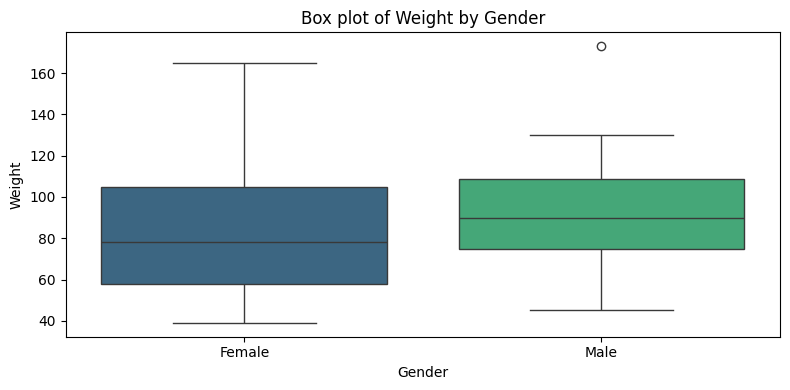

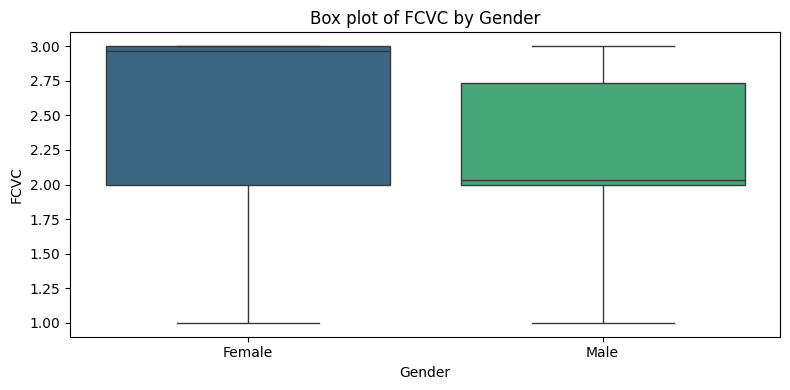

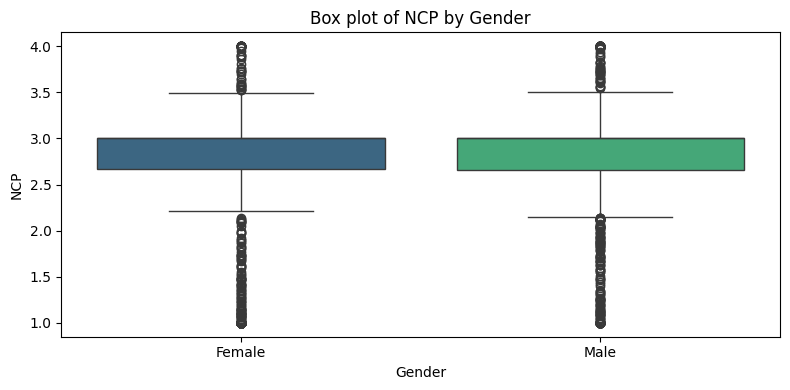

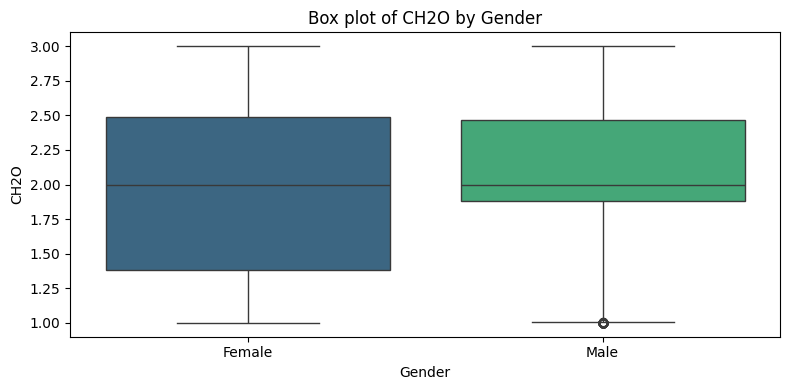

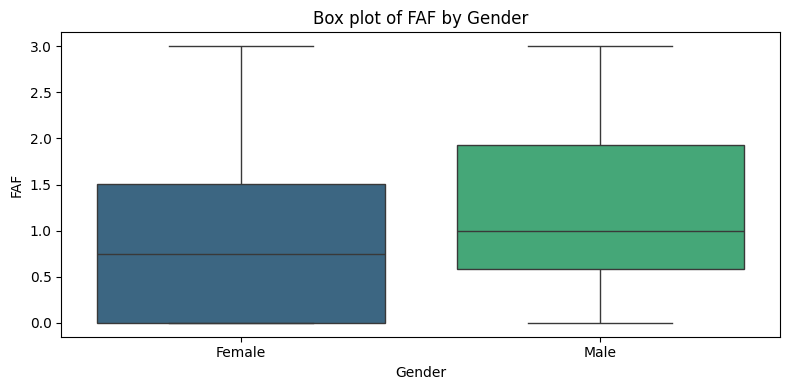

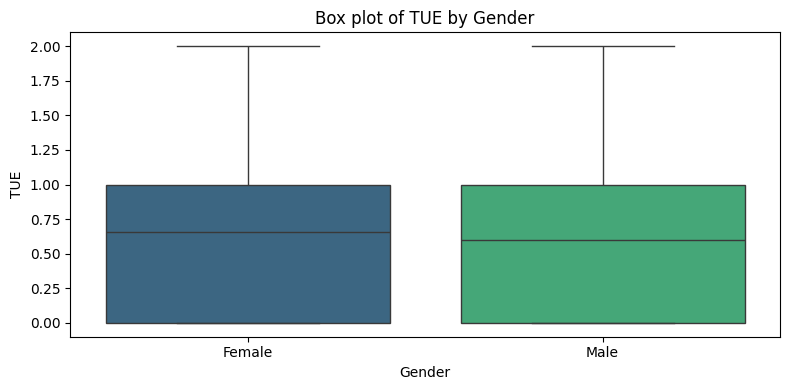

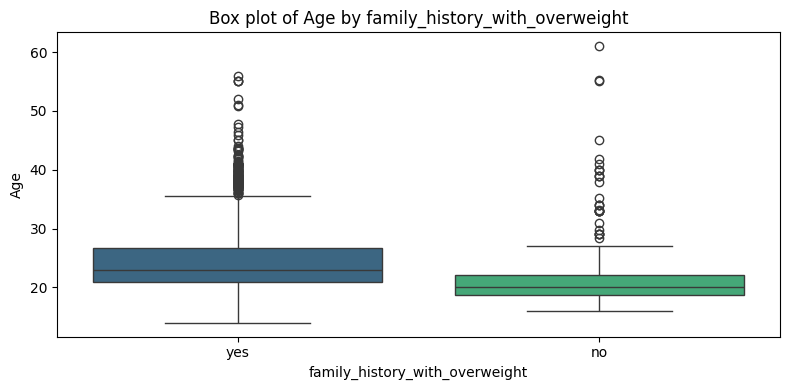

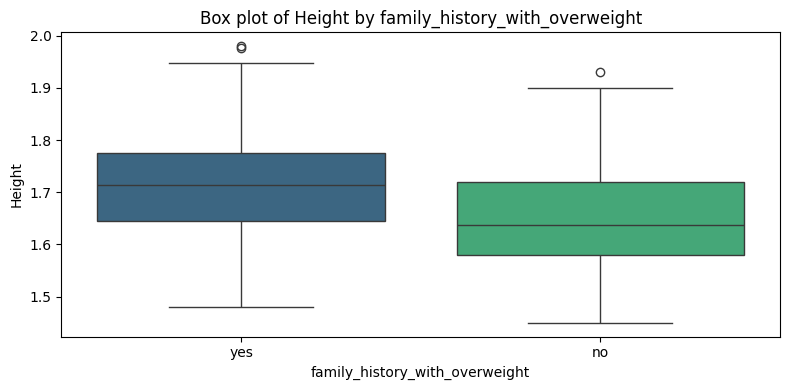

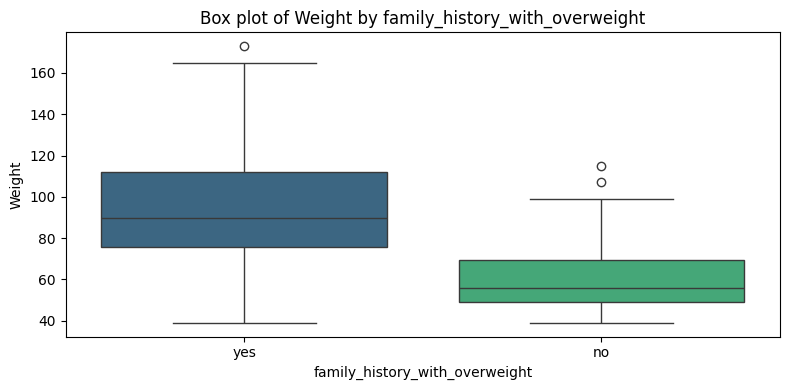

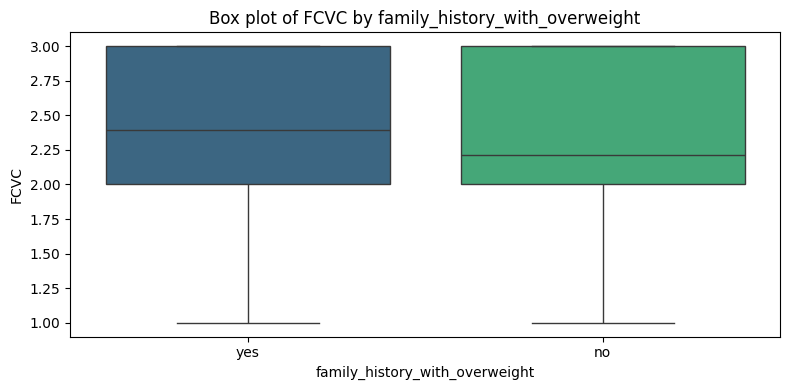

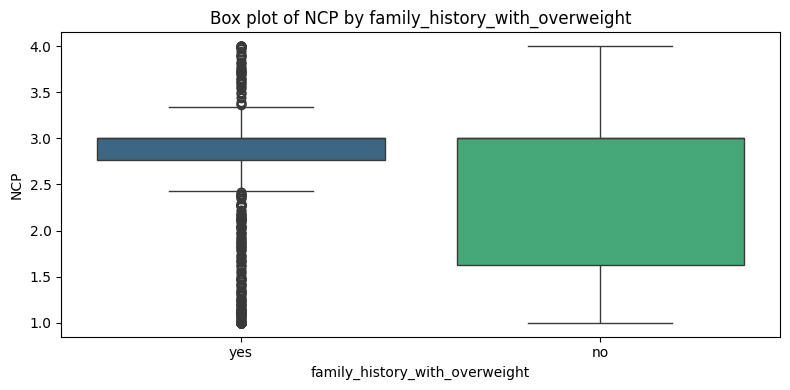

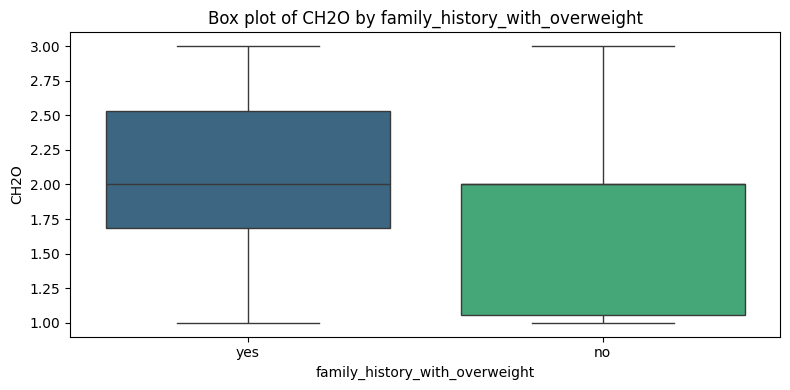

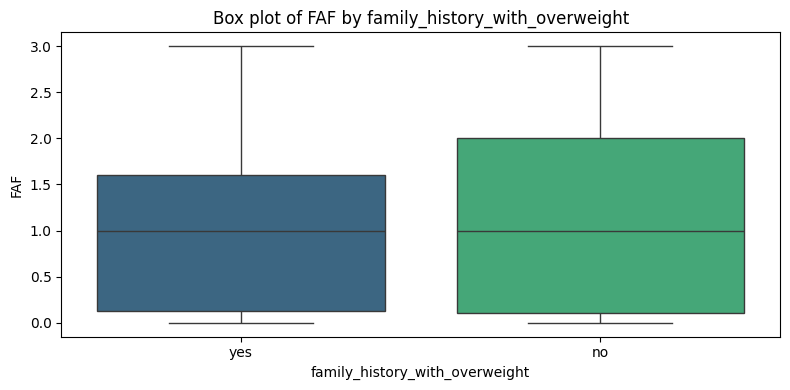

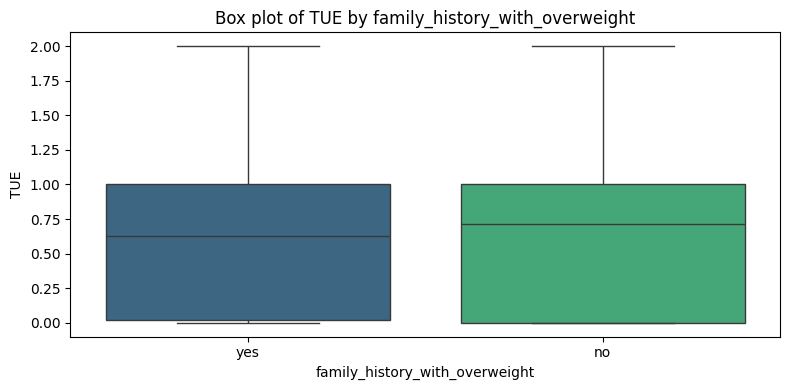

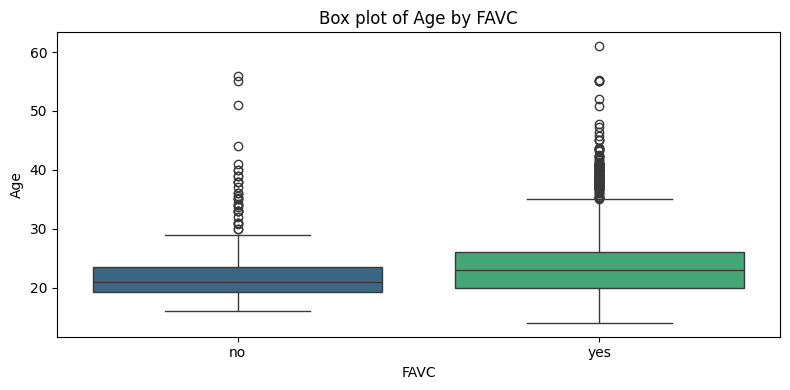

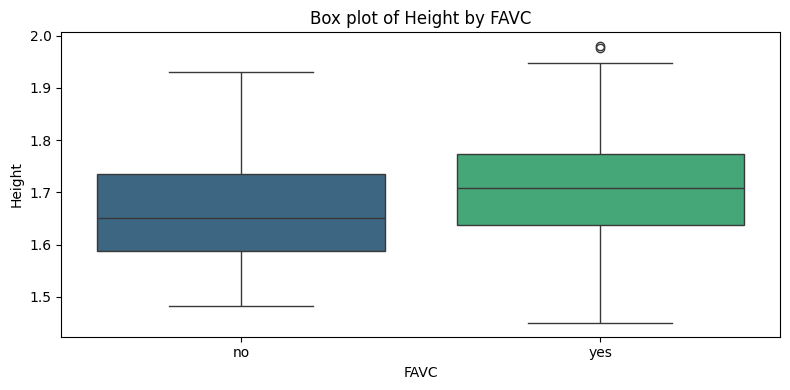

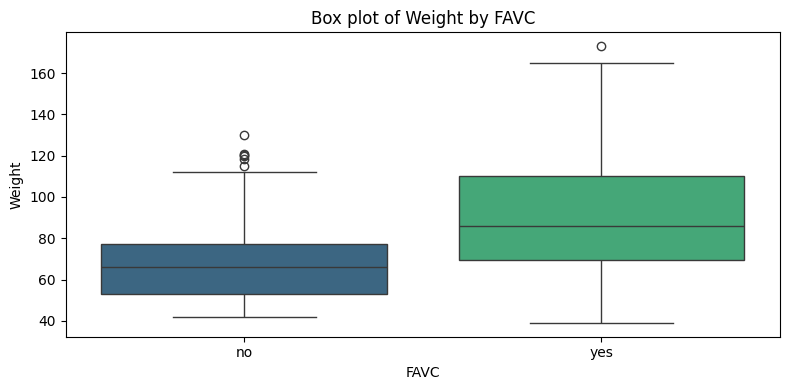

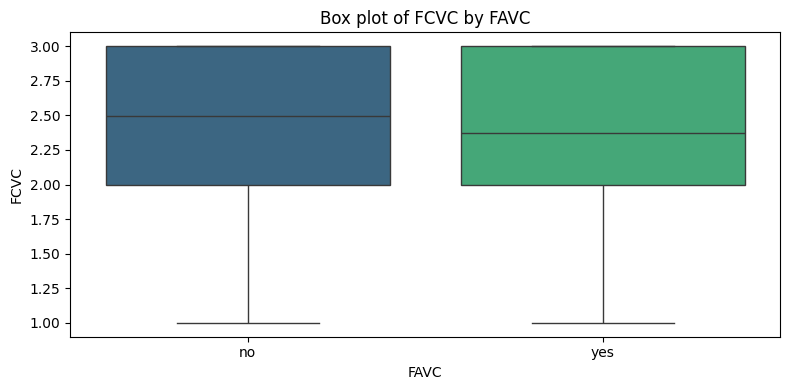

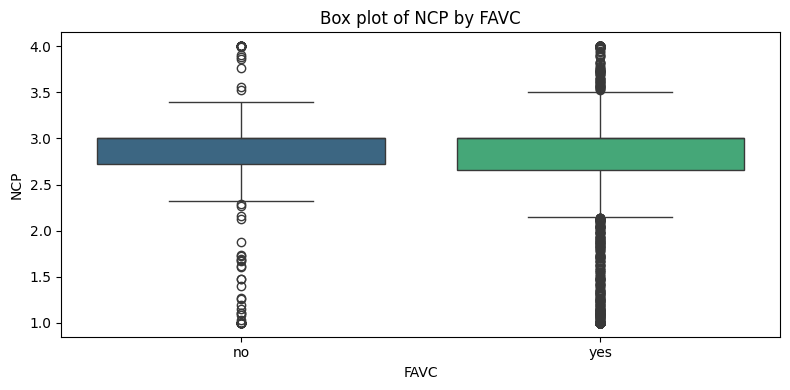

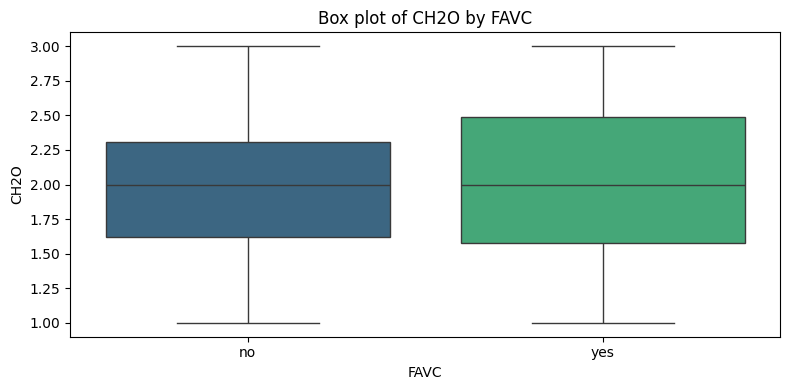

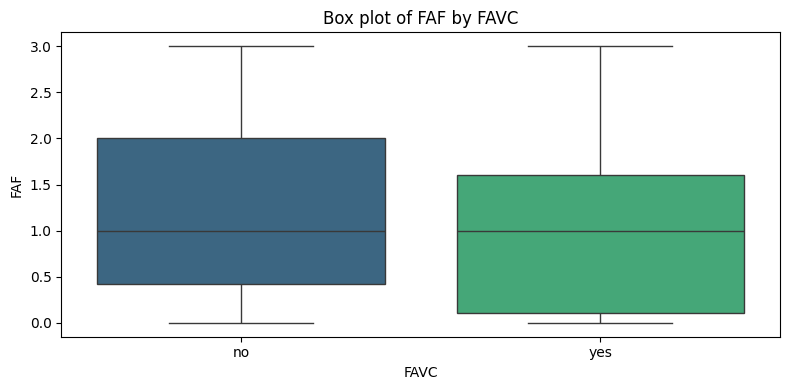

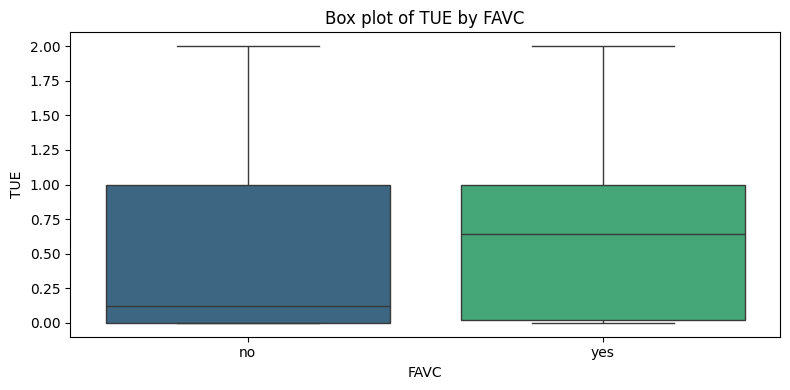

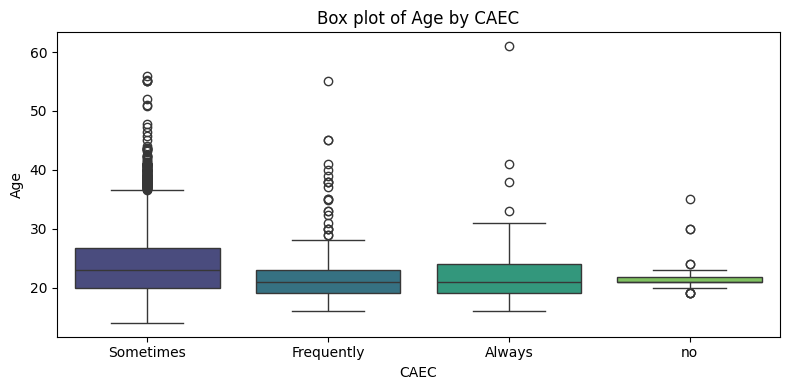

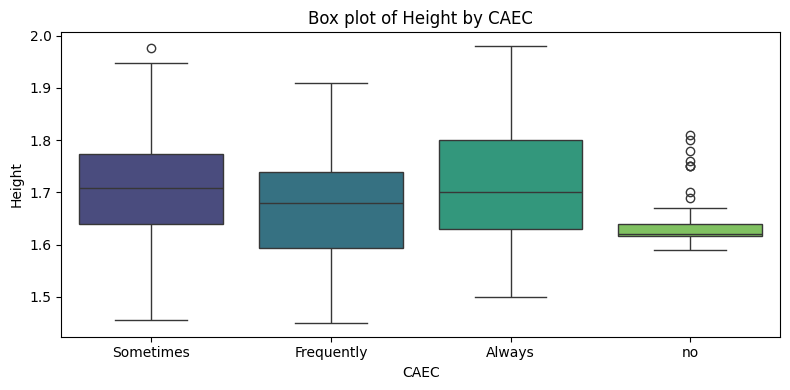

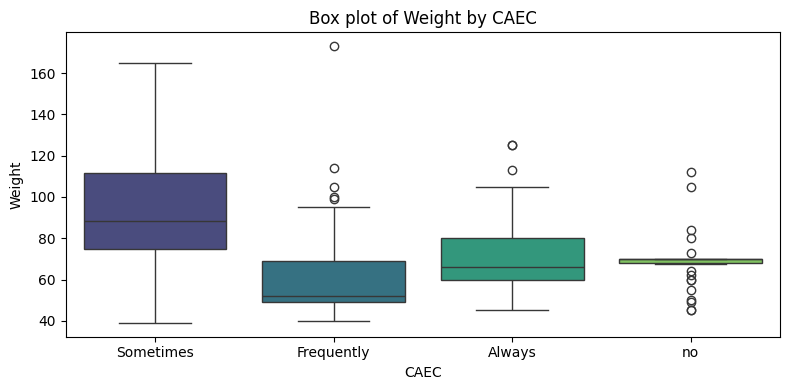

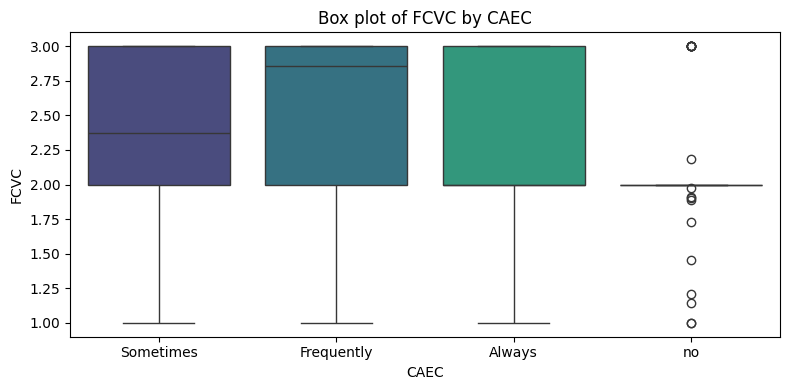

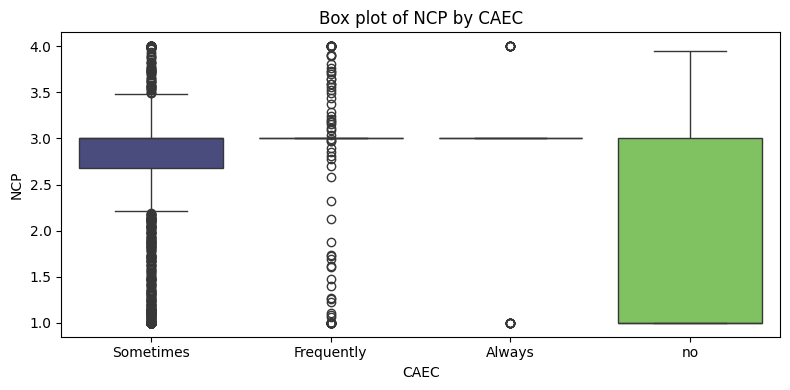

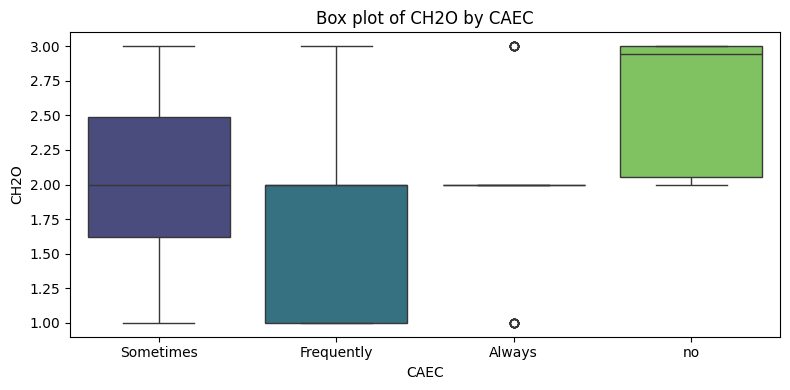

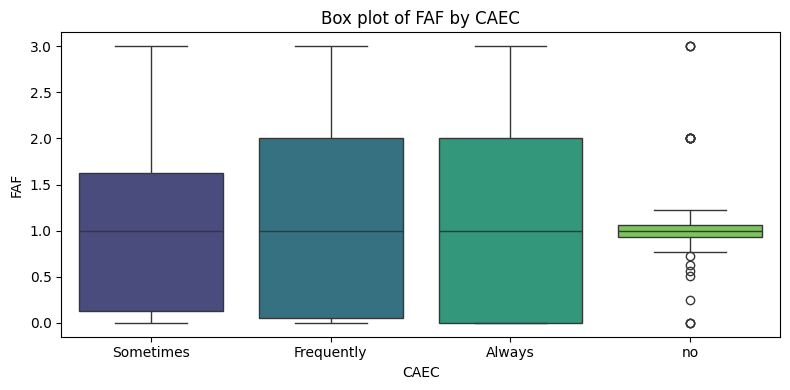

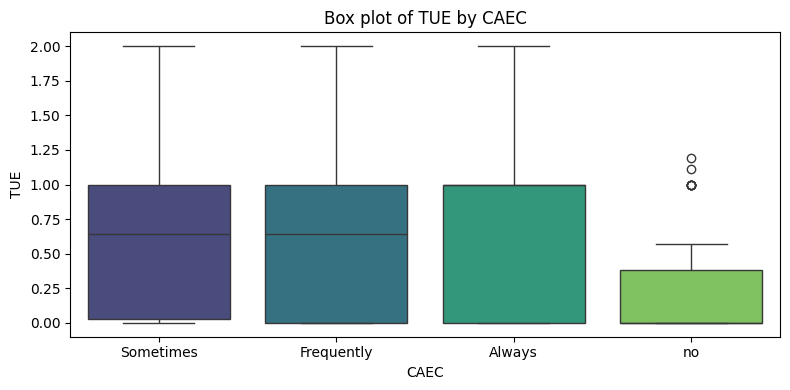

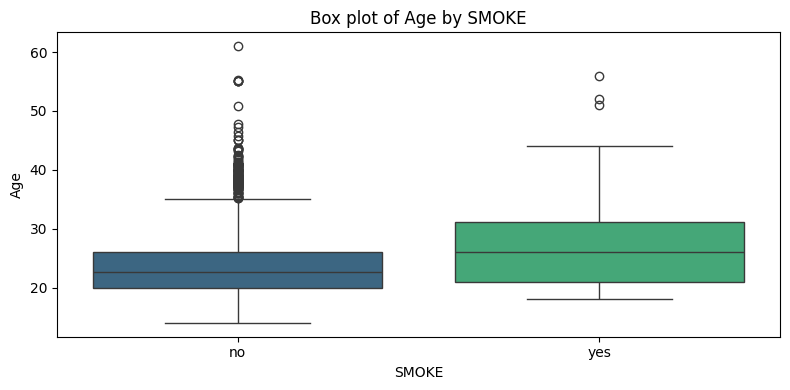

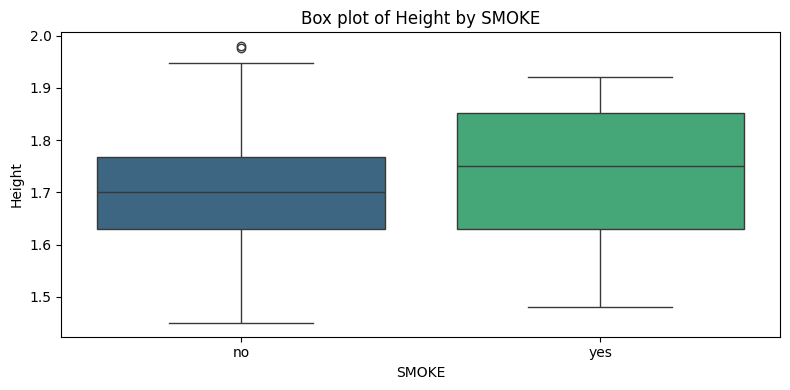

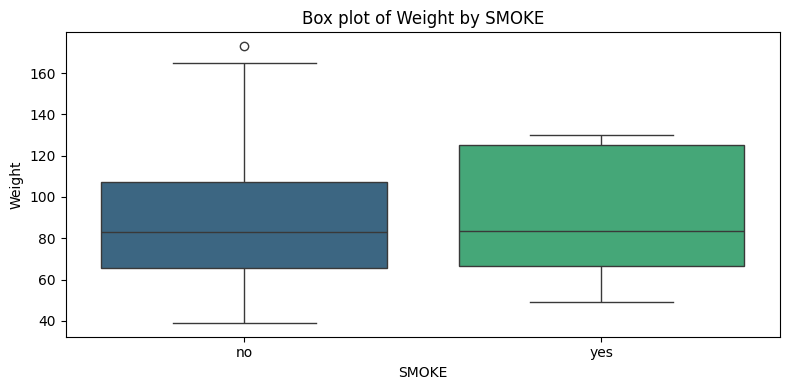

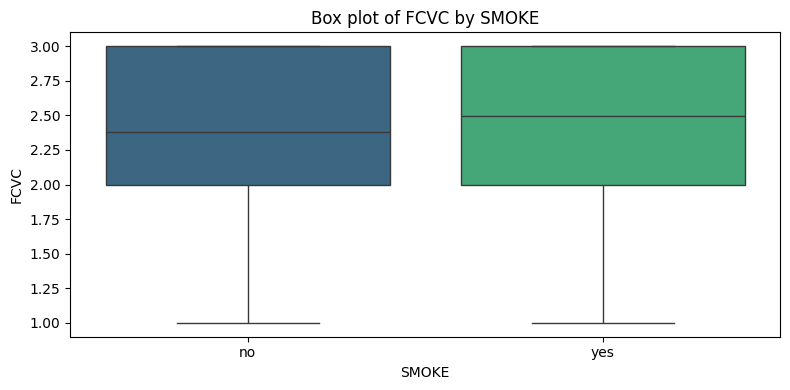

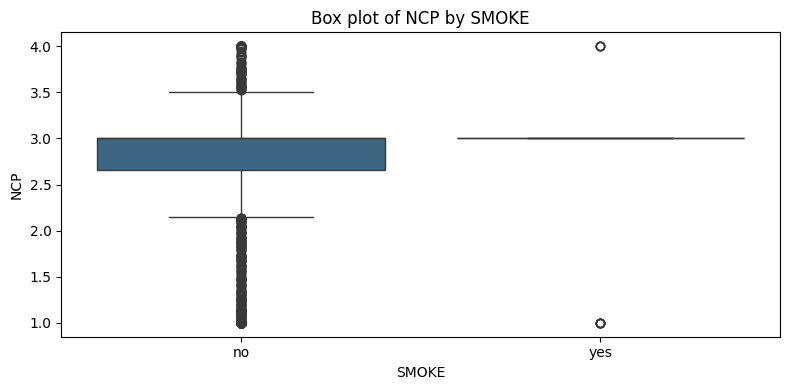

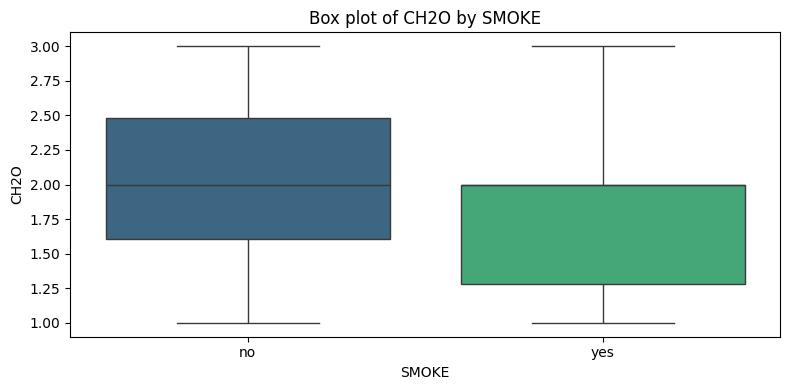

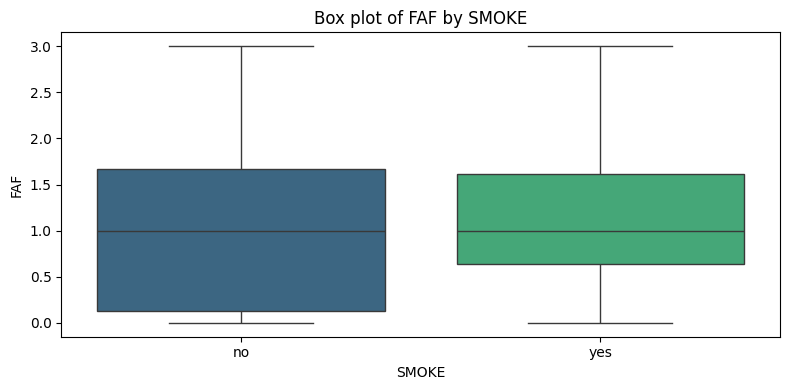

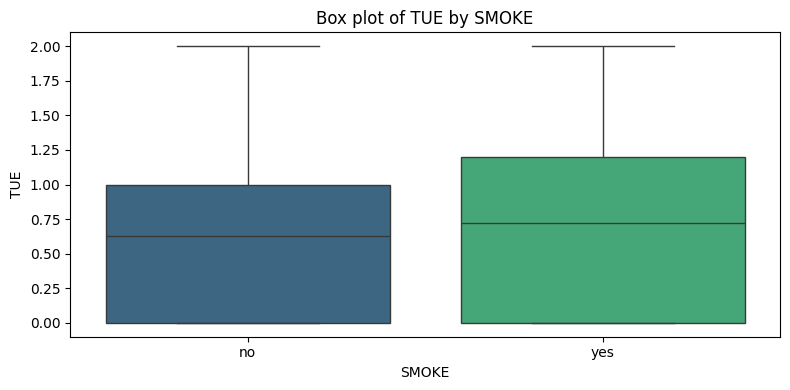

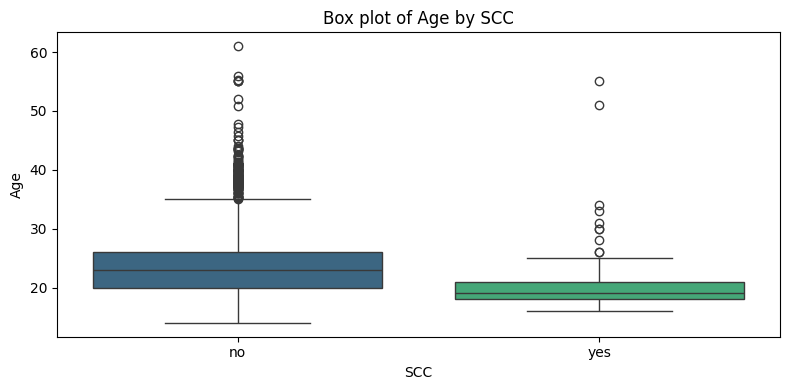

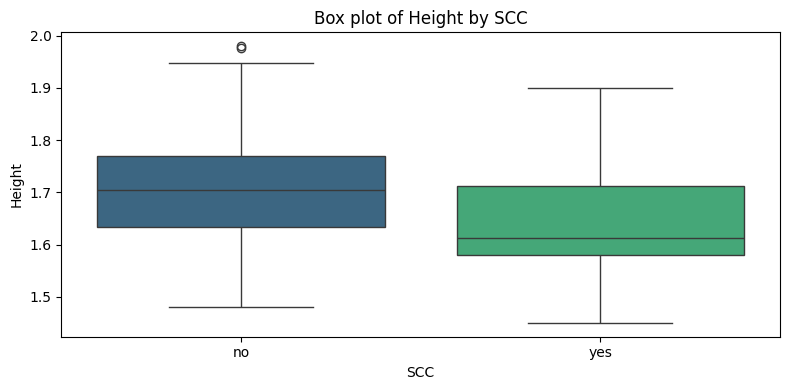

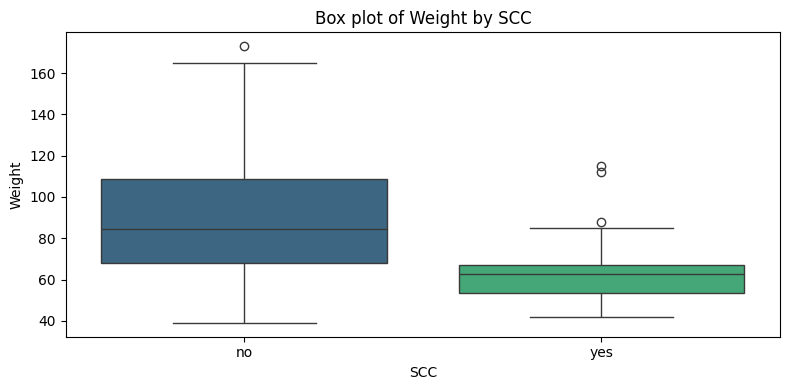

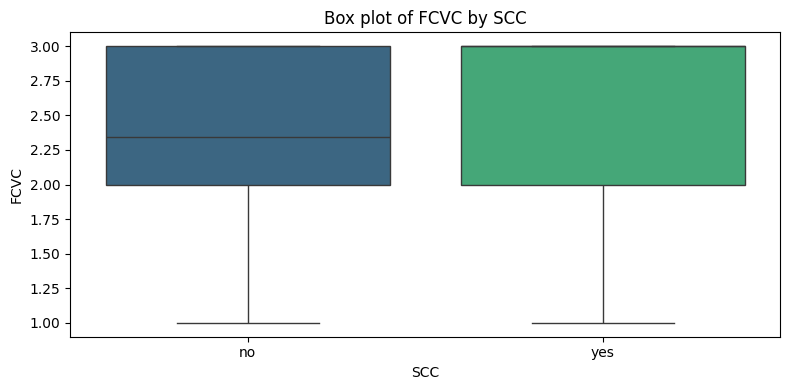

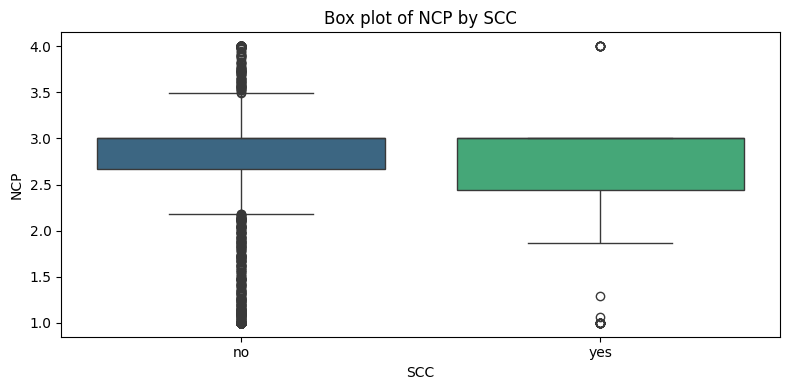

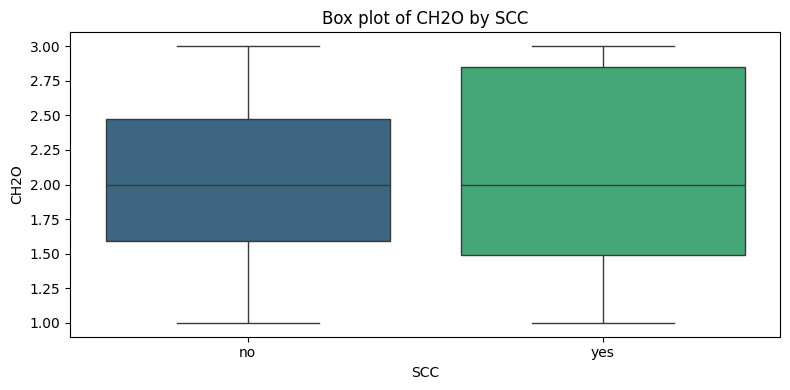

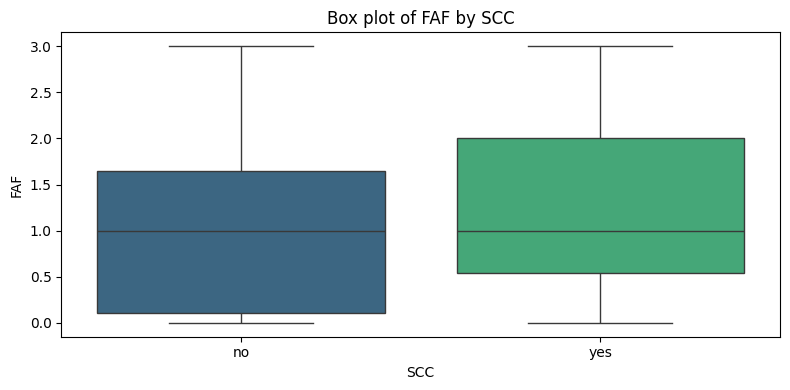

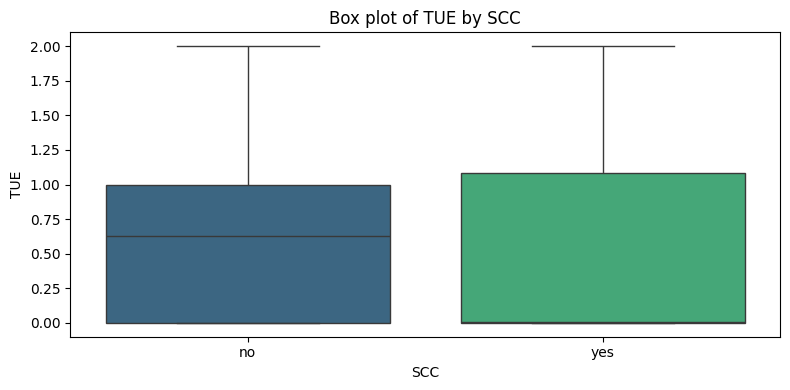

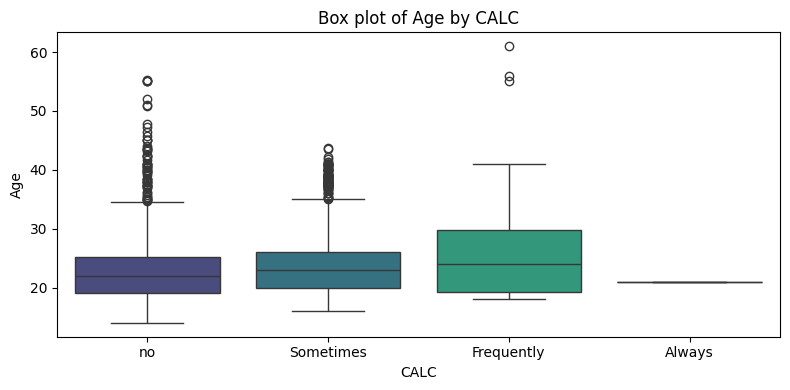

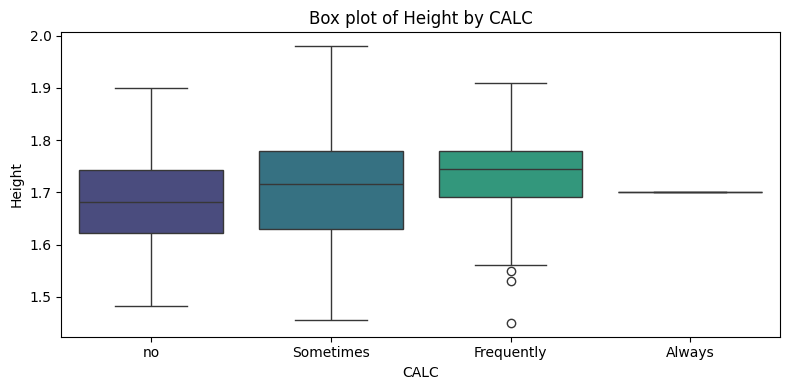

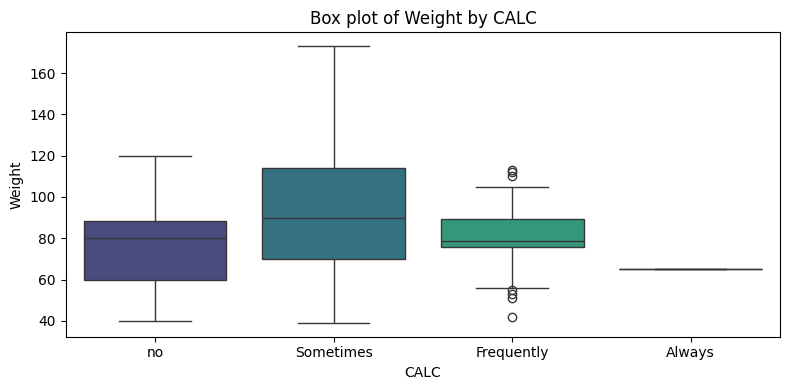

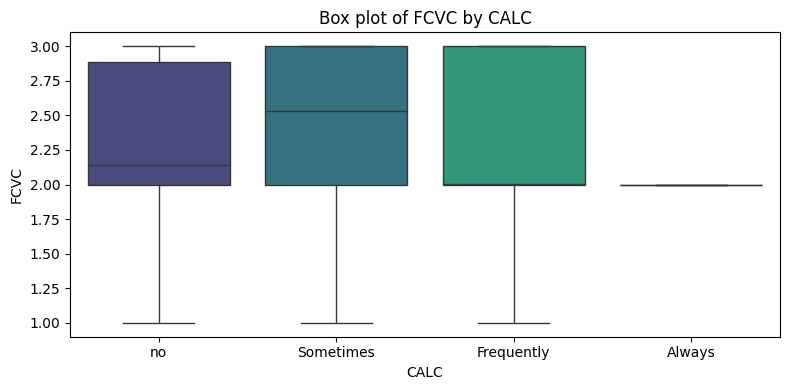

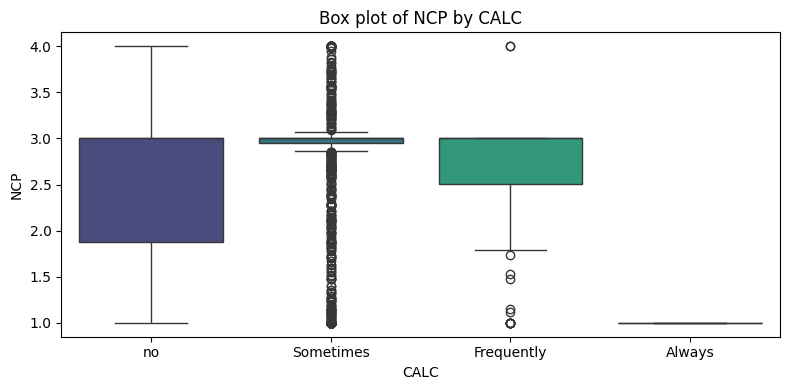

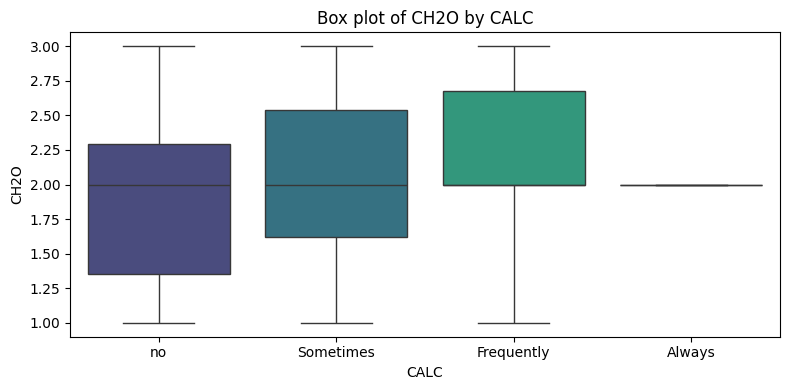

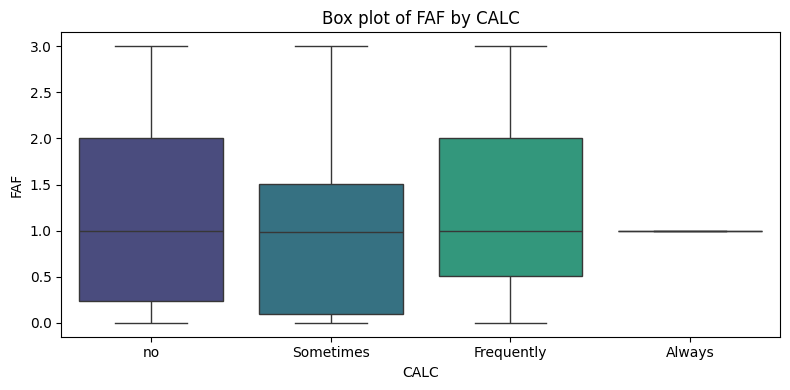

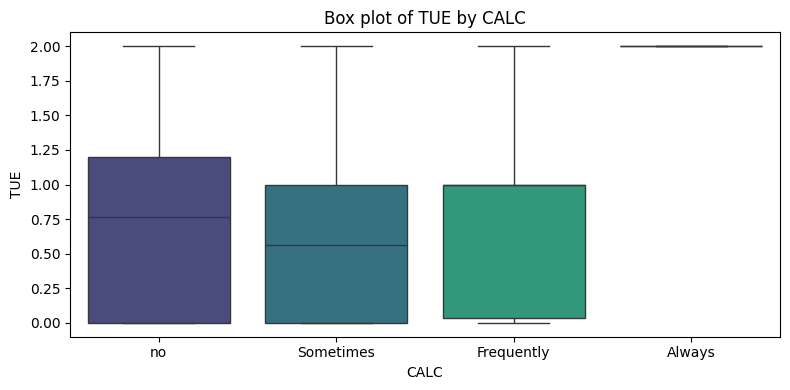

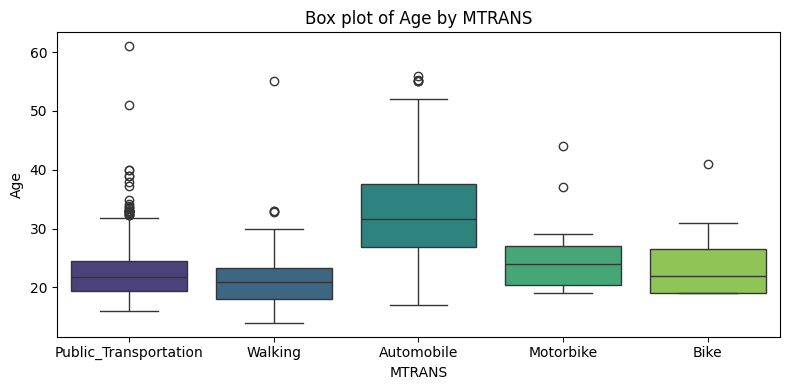

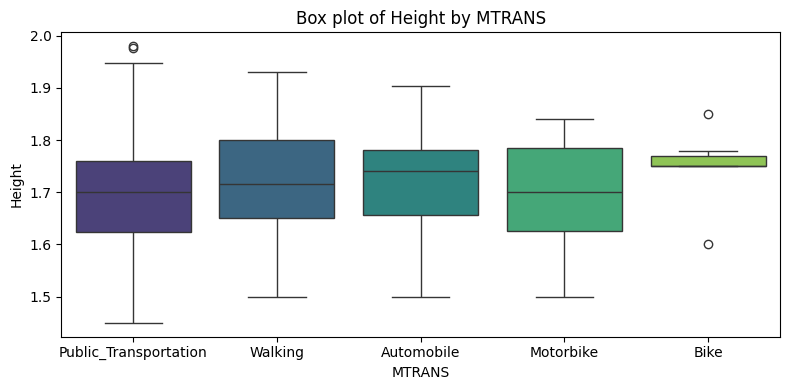

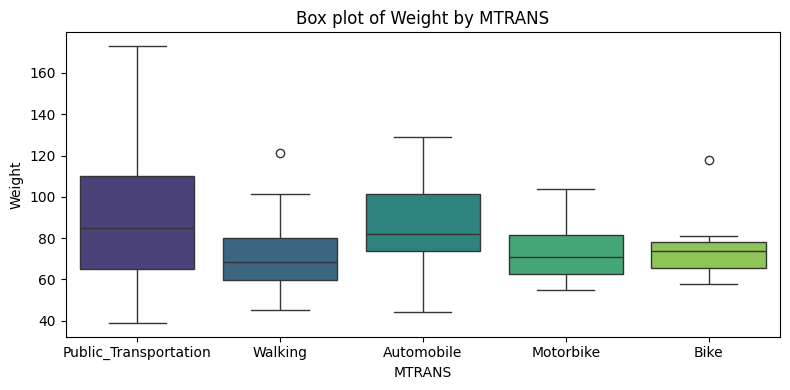

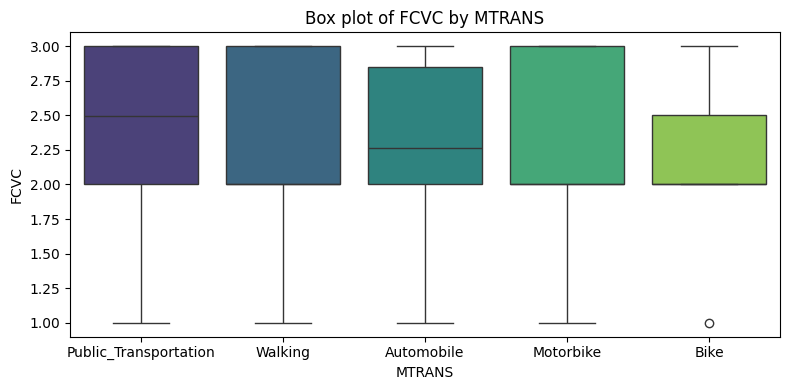

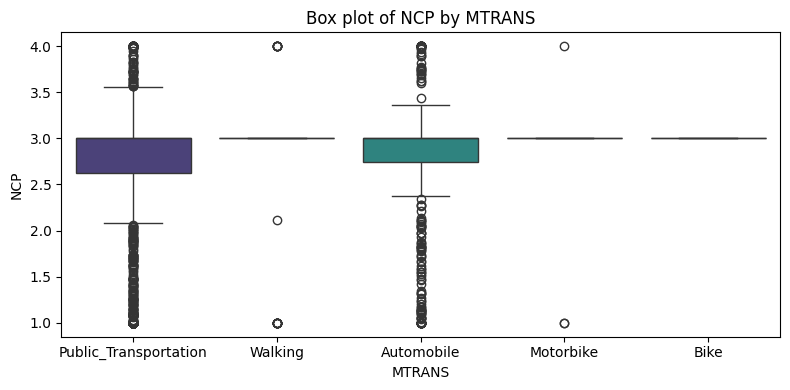

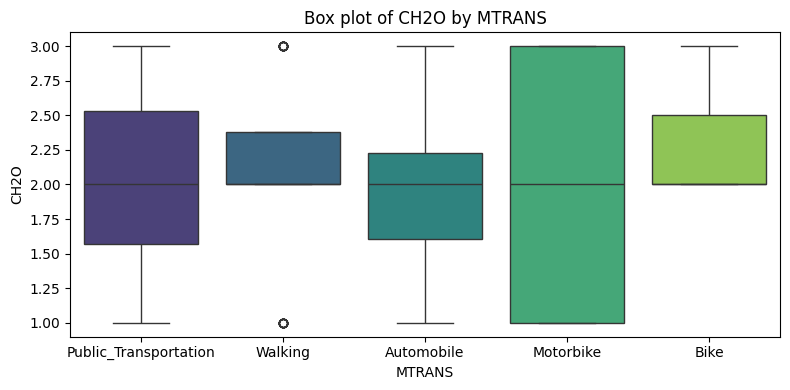

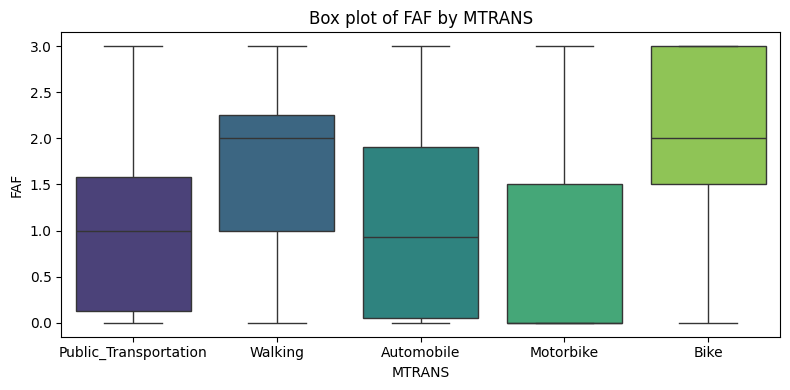

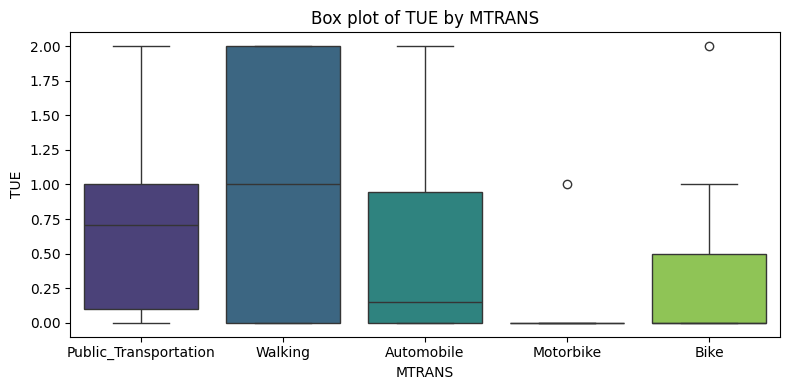

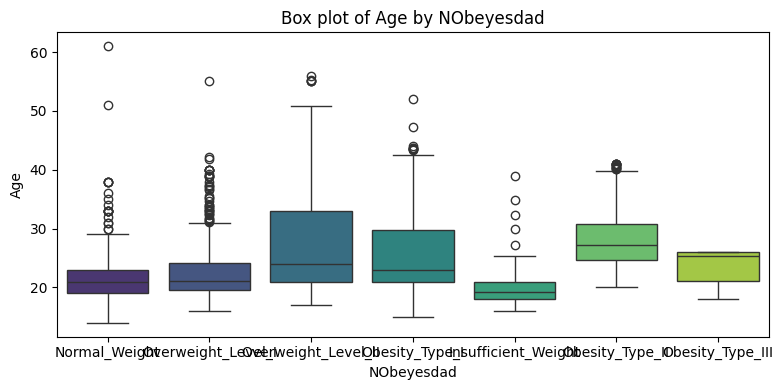

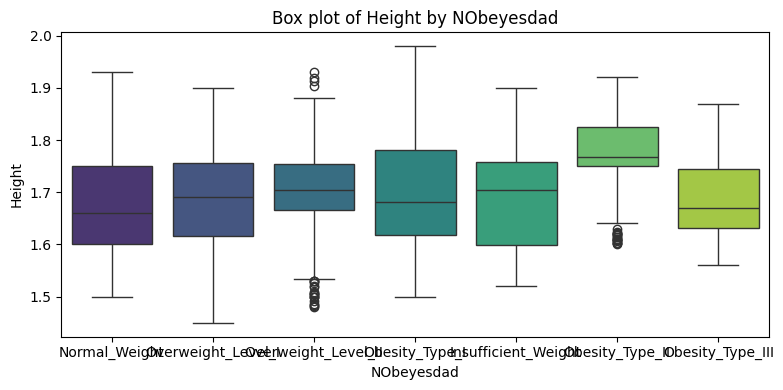

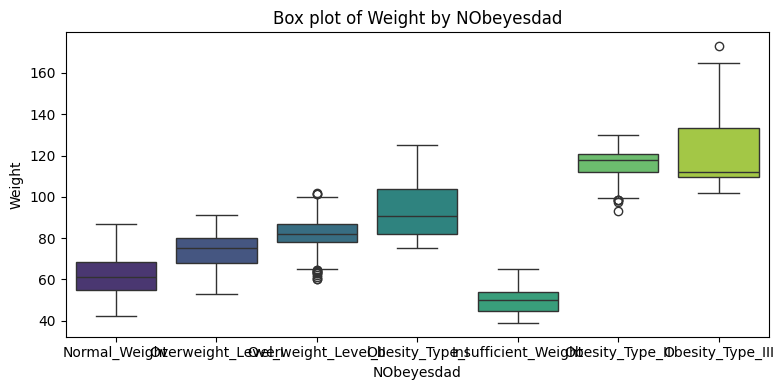

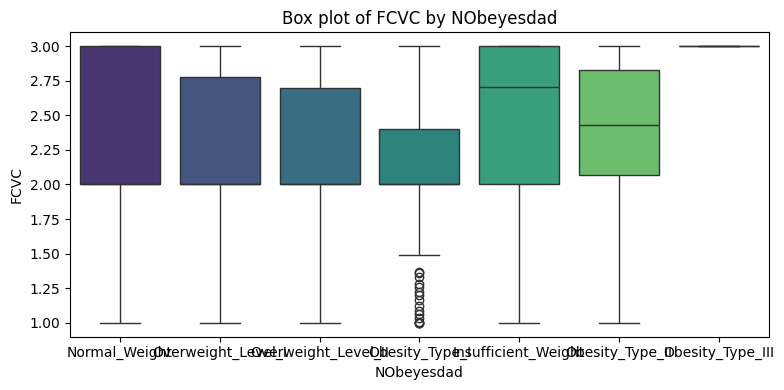

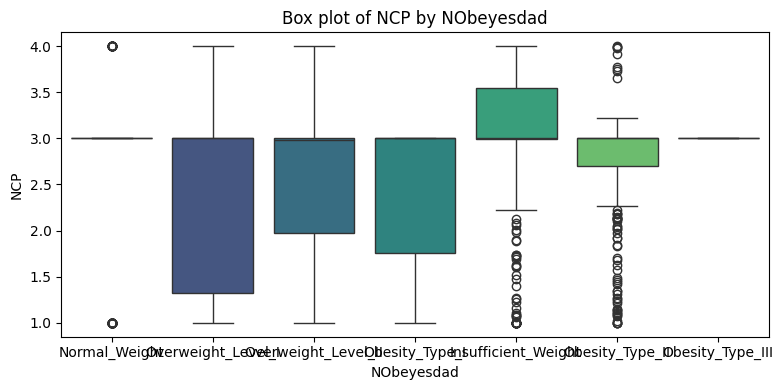

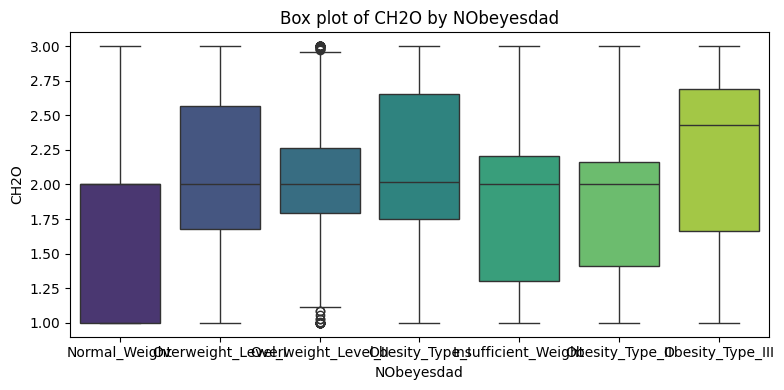

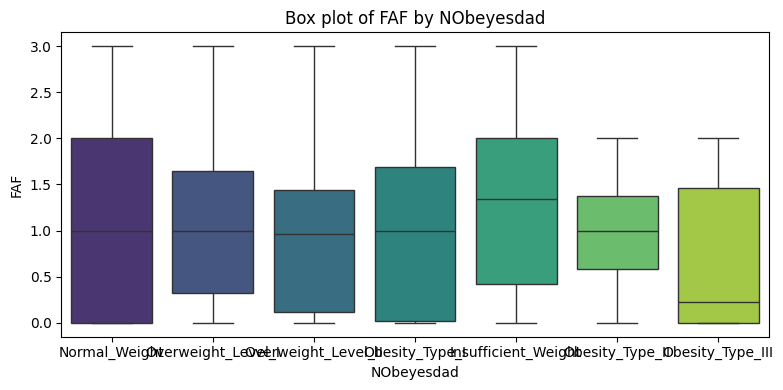

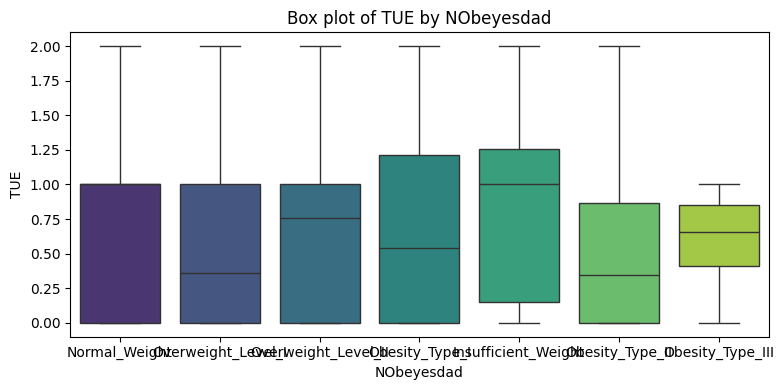

In [ ]:
# Box plots
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=cat, y=num, data=data, palette="viridis")
        plt.title(f'Box plot of {num} by {cat}')
        plt.tight_layout()
        plt.show()



 ### Multivariate Analysis



In [ ]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


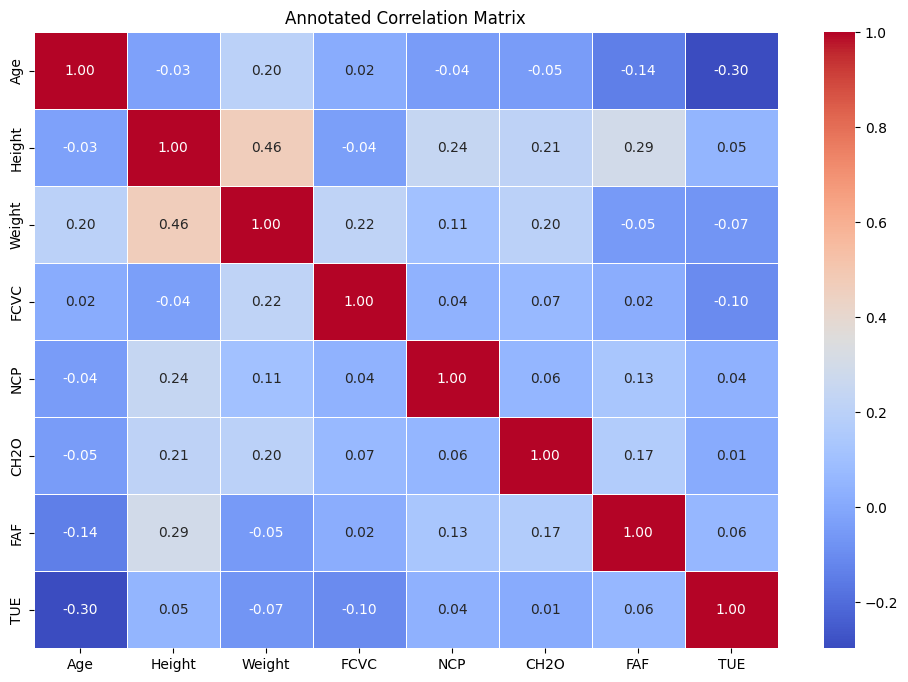

In [ ]:
# Heatmap with annotations for detailed correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Annotated Correlation Matrix')
plt.show()

In [ ]:
# Pairplot colored by a Obesity feature
sns.pairplot(data, hue=cat_cols[8])
plt.show()


Output hidden; open in https://colab.research.google.com to view.

#### Observation

Height and Weight features are correlated with highly correlated of a value of 46%. And also these two features scatterplot shows some good clustering formation. Even though there is no clear separation in the plot, we can find some relation.



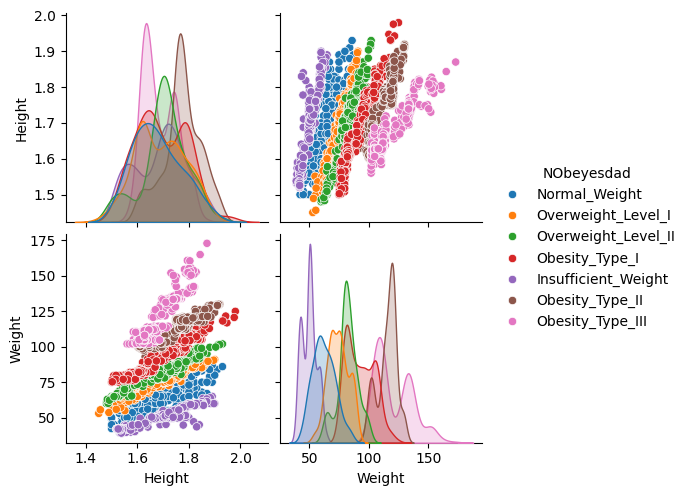

In [ ]:
sns.pairplot(data[['Height', 'Weight', 'NObeyesdad']], hue='NObeyesdad')
plt.show()

### plotly visualization for interavtive type (way-3)


In [ ]:
'''
# List of numerical columns
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Interactive Histograms
for col in num_cols:
    fig = px.histogram(data, x=col, nbins=15, title=f'Histogram of {col}')
    fig.show()

# Interactive Box plots
for col in num_cols:
    fig = px.box(data, y=col, title=f'Box plot of {col}')
    fig.show()
'''

In [ ]:
'''
# Scatter matrix (similar to pairplot)
fig = px.scatter_matrix(data, dimensions=num_cols, title='Scatter Matrix of Numerical Columns')
fig.show()

# Interactive Correlation Matrix
corr_matrix = data[num_cols].corr()
fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix.values,
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   colorscale='Viridis'))

fig.update_layout(title='Correlation Matrix',
                  xaxis_nticks=36)
fig.show()
'''

In [ ]:
'''
# List of categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Interactive Box plots
for cat in cat_cols:
    for num in num_cols:
        fig = px.box(data, x=cat, y=num, title=f'Box plot of {num} by {cat}')
        fig.show()
'''

"\n# List of categorical columns\ncat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()\n\n# Interactive Box plots\nfor cat in cat_cols:\n    for num in num_cols:\n        fig = px.box(data, x=cat, y=num, title=f'Box plot of {num} by {cat}')\n        fig.show()\n"

In [ ]:
#data.Gender.value_counts()

In [ ]:
# data.family_history_with_overweight.value_counts()

## 2. Preprocessing Step :
### Handling the Numerical & Categorical Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv("ObesityDataSet.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Scaling

Scaling is required for certain ML models, especialy in clustering algorithms like KMeans,
where the distancec metric's (like euclidean) are sensitive to the numeric values.

Hence it is important to the scaling prior to run these models.

In [ ]:
# Applying the scaler operations on the numerical columns of the data set.

num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,-0.522124,-0.875589,-0.862558,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,-1.188039,0.561997,no,Public_Transportation,Normal_Weight
1,Female,-0.522124,-1.947599,-1.168077,yes,no,1.088342,0.404153,Sometimes,yes,1.618759,yes,2.339750,-1.080625,Sometimes,Public_Transportation,Normal_Weight
2,Male,-0.206889,1.054029,-0.366090,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,1.163820,0.561997,Frequently,Public_Transportation,Normal_Weight
3,Male,0.423582,1.054029,0.015808,no,no,1.088342,0.404153,Sometimes,no,-0.013073,no,1.163820,-1.080625,Frequently,Walking,Overweight_Level_I
4,Male,-0.364507,0.839627,0.122740,no,no,-0.785019,-2.167023,Sometimes,no,-0.013073,no,-1.188039,-1.080625,Sometimes,Public_Transportation,Overweight_Level_II


### Handling the Categorical Features

In most of the data, we can find categorical features like Genders columns with valeus Male/Female and Ratings column with of ranges 1 to 5. Most of algorithms struggles to deal with categories as string.

Hence we have to convert categories into Numeric. Label Encoding, One-Hot Encoding, Binary Encoding, Frequency Encoding are some of the techniques used to do the conversion.

One of best way to handle the nominal bivariate categorical features is One-Hot Encoding. One-hot encoding does not introduce any ordinality in the data, with increased dimensionality of the dataset.

While for the ordinal categories we can use Label encoding method. Since we label the category with suitable numbering order, this will not increase the feature dimensions of the dataset.



In [ ]:
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,-0.522124,-0.875589,-0.862558,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,-1.188039,0.561997,no,Public_Transportation,Normal_Weight
1,Female,-0.522124,-1.947599,-1.168077,yes,no,1.088342,0.404153,Sometimes,yes,1.618759,yes,2.339750,-1.080625,Sometimes,Public_Transportation,Normal_Weight
2,Male,-0.206889,1.054029,-0.366090,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,1.163820,0.561997,Frequently,Public_Transportation,Normal_Weight
3,Male,0.423582,1.054029,0.015808,no,no,1.088342,0.404153,Sometimes,no,-0.013073,no,1.163820,-1.080625,Frequently,Walking,Overweight_Level_I
4,Male,-0.364507,0.839627,0.122740,no,no,-0.785019,-2.167023,Sometimes,no,-0.013073,no,-1.188039,-1.080625,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,0.738817,-0.875589,-1.282647,no,yes,-0.785019,0.404153,Sometimes,no,-0.013073,no,-1.188039,-1.080625,Sometimes,Automobile,Normal_Weight
6,Female,-0.206889,-2.162001,-1.206267,yes,yes,1.088342,0.404153,Sometimes,no,-0.013073,no,-0.012109,-1.080625,Sometimes,Motorbike,Normal_Weight
7,Male,-0.364507,-0.661187,-1.282647,no,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,2.339750,-1.080625,Sometimes,Public_Transportation,Normal_Weight
8,Male,-0.049271,0.839627,-0.862558,yes,yes,1.088342,0.404153,Sometimes,no,-0.013073,no,-0.012109,0.561997,Frequently,Public_Transportation,Normal_Weight
9,Male,-0.364507,0.196421,-0.709799,yes,yes,-0.785019,0.404153,Sometimes,no,-0.013073,no,-0.012109,0.561997,no,Public_Transportation,Normal_Weight


In [ ]:
data.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

Now, lets explore the types of categorical variables in our data set.

In [ ]:
for col in data.select_dtypes(include='object'):
  print(f"The unique values of the '{col}' column is:")
  print(data[col].unique(), "\n")

The unique values of the 'Gender' column is:
['Female' 'Male'] 

The unique values of the 'family_history_with_overweight' column is:
['yes' 'no'] 

The unique values of the 'FAVC' column is:
['no' 'yes'] 

The unique values of the 'CAEC' column is:
['Sometimes' 'Frequently' 'Always' 'no'] 

The unique values of the 'SMOKE' column is:
['no' 'yes'] 

The unique values of the 'SCC' column is:
['no' 'yes'] 

The unique values of the 'CALC' column is:
['no' 'Sometimes' 'Frequently' 'Always'] 

The unique values of the 'MTRANS' column is:
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'] 

The unique values of the 'NObeyesdad' column is:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'] 



In [ ]:
num_cols = data.columns[(data.nunique().values < 10)].to_list()
num_cols

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

For the above listed categorical columns

Since the Gender column is a nominal features, we shall use the one-hot encoding.

While the `['family_history_with_overweight',
'FAVC(Frequent consumption of high caloric food)',
'SMOKE']` features are binary variables, we can use Label encoding with

    'yes' -  1
    'no'  -  0




for the 'SCC (Calories consumption monitoring)' column, based on the bar chart, it is found that for the 'yes' category the average weight is around 60 unit while for 'no' category it is around 85 unit. Hence it is obvious that, people with monitoring their calories intake having lesser weight, leads to normal weight. So we can use label encoding as follows

    'yes' -  0
    'no'  -  1
This encoding will reflect the observed relationship between calorie monitoring and weight.





Since the 'CAEC (Consumption of food between meals )' and 'CALC (Consumption of alcohol)' columns are ordinal features, we hsve to use the below mentioned label encoding with order
  
    'no'         - 0
    'Sometimes'  - 1
    'Frequently' - 2
    'Always'     - 3


The unique values of the 'MTRANS' column is ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'] we can use One-hot encoding

since the feature 'NObeyesdad' is our target features, we do not require to use in our algorithm. So we kept this feature as per original dataset.

In [ ]:
# Encode binary categorical columns
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE']
for col in binary_columns:
    data[col] = data[col].map({'no': 0, 'yes': 1})

# Encode 'SCC' column with the specified labels
data['SCC'] = data['SCC'].map({'yes': 0, 'no': 1})

# Encode ordinal categorical columns
ordinal_columns = {
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
}
for col, mapping in ordinal_columns.items():
    data[col] = data[col].map(mapping)

# One-hot encode nominal categorical columns
nominal_columns = ['Gender', 'MTRANS']
data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)
data = data.astype({col: int for col in data.select_dtypes(include=[bool]).columns})

# Drop the target column 'NObeyesdad'
target = data.pop('NObeyesdad')


In [ ]:
data.head(10)

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Gender_Male,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,1,0,-0.013073,1,-1.188039,0.561997,0,0,0,0,1,0
1,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,1,1,1.618759,0,2.339750,-1.080625,1,0,0,0,1,0
2,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,1,0,-0.013073,1,1.163820,0.561997,2,1,0,0,1,0
3,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,1,0,-0.013073,1,1.163820,-1.080625,2,1,0,0,0,1
4,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,1,0,-0.013073,1,-1.188039,-1.080625,1,1,0,0,1,0
5,0.738817,-0.875589,-1.282647,0,1,-0.785019,0.404153,1,0,-0.013073,1,-1.188039,-1.080625,1,1,0,0,0,0
6,-0.206889,-2.162001,-1.206267,1,1,1.088342,0.404153,1,0,-0.013073,1,-0.012109,-1.080625,1,0,0,1,0,0
7,-0.364507,-0.661187,-1.282647,0,0,-0.785019,0.404153,1,0,-0.013073,1,2.339750,-1.080625,1,1,0,0,1,0
8,-0.049271,0.839627,-0.862558,1,1,1.088342,0.404153,1,0,-0.013073,1,-0.012109,0.561997,2,1,0,0,1,0
9,-0.364507,0.196421,-0.709799,1,1,-0.785019,0.404153,1,0,-0.013073,1,-0.012109,0.561997,0,1,0,0,1,0


In [ ]:
target.head(10)

0          Normal_Weight
1          Normal_Weight
2          Normal_Weight
3     Overweight_Level_I
4    Overweight_Level_II
5          Normal_Weight
6          Normal_Weight
7          Normal_Weight
8          Normal_Weight
9          Normal_Weight
Name: NObeyesdad, dtype: object

#### Apply PCA

In [ ]:
# Creating the pca
pca = PCA()
pca_components = pca.fit_transform(data)

Explained Variance:
[0.20436465 0.16527251 0.11682163 0.10645706 0.10290908 0.08424242
 0.07428374 0.04527475 0.02742779 0.01996459 0.01229224 0.01158301
 0.01057728 0.00916597 0.00420326 0.00220605 0.00207679 0.000533
 0.00034419]
Cumulative Variance:
[0.20436465 0.36963716 0.48645879 0.59291585 0.69582493 0.78006735
 0.85435108 0.89962583 0.92705362 0.94701821 0.95931044 0.97089345
 0.98147074 0.99063671 0.99483996 0.99704602 0.99912281 0.99965581
 1.        ]


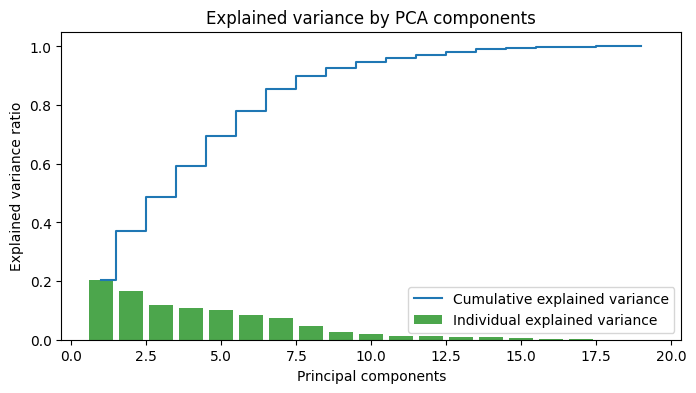

In [ ]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:")
print(explained_variance)

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Variance:")
print(cumulative_variance)

# Visualize explained variance by each PCA component
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='g', align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.title('Explained variance by PCA components')
plt.show()


Creating new dataframe named 'pca_df' with 3 components (Way-01)

Even thought we get less variance with the 3 PCA component, we will use only 3 components now. So that we can view the result in the 3D plot.

In [ ]:
# Create a DataFrame with only the first three PCA components
pca_df = pd.DataFrame(pca_components[:, :3], columns=['PCA1', 'PCA2', 'PCA3'])

# Display the first few rows of the DataFrame
print(pca_df.head())

       PCA1      PCA2      PCA3
0  1.462779 -0.632104  0.128931
1  0.381433 -0.758648 -1.915662
2 -0.946549 -1.302819  0.920487
3 -1.316067  0.495543 -0.223554
4  0.567040  0.742153  0.760164


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)


In [ ]:
target.nunique()

7

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
import plotly.express as px

# Add actual target labels to the PCA DataFrame for visualization
pca_df['Actual'] = target

### KMeans Clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_clusters = kmeans.fit_predict(pca_df[['PCA1', 'PCA2', 'PCA3']])
pca_df['KMeans_Cluster'] = kmeans_clusters

# Visualize the KMeans clustering result
fig_kmeans = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', color='KMeans_Cluster', title='K-means Clustering on PCA-Transformed Data (3D)')
fig_kmeans.show()

# Calculate RMSE for KMeans
rmse_kmeans = np.sqrt(mean_squared_error(target_encoded, kmeans_clusters))
print(f"KMeans RMSE: {rmse_kmeans}")

### Visualize the Actual Target Labels
fig_actual = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', color='Actual', title='Actual Target Labels on PCA-Transformed Data (3D)')
fig_actual.show()


KMeans RMSE: 2.8275058265955084


In [ ]:

### DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_clusters = dbscan.fit_predict(pca_df[['PCA1', 'PCA2', 'PCA3']])
pca_df['DBSCAN_Cluster'] = dbscan_clusters

# Visualize the DBSCAN clustering result
fig_dbscan = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', color='DBSCAN_Cluster', title='DBSCAN Clustering on PCA-Transformed Data (3D)')
fig_dbscan.show()

# Calculate RMSE for DBSCAN
rmse_dbscan = np.sqrt(mean_squared_error(target_encoded, dbscan_clusters))
print(f"DBSCAN RMSE: {rmse_dbscan}")

### Visualize the Actual Target Labels
fig_actual = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', color='Actual', title='Actual Target Labels on PCA-Transformed Data (3D)')
fig_actual.show()


DBSCAN RMSE: 7.865068873484314


In [ ]:
### GMM Clustering
gmm = GaussianMixture(n_components=7, random_state=42)
gmm_clusters = gmm.fit_predict(pca_df[['PCA1', 'PCA2', 'PCA3']])
pca_df['GMM_Cluster'] = gmm_clusters

# Visualize the GMM clustering result
fig_gmm = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', color='GMM_Cluster', title='GMM Clustering on PCA-Transformed Data (3D)')
fig_gmm.show()

# Calculate RMSE for GMM
rmse_gmm = np.sqrt(mean_squared_error(target_encoded, gmm_clusters))
print(f"GMM RMSE: {rmse_gmm}")

### Visualize the Actual Target Labels
fig_actual = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', color='Actual', title='Actual Target Labels on PCA-Transformed Data (3D)')
fig_actual.show()

GMM RMSE: 2.7620799665025646


In [ ]:
### way 2 to be implemented
'''

to be contd.

'''

'\n\nto be contd.\n\n'

In [ ]:
# Bi-pi